<a href="https://colab.research.google.com/github/Veeru5423/Veera-Babu/blob/main/Age_group_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('/content/age group 2011.csv')
df.head(n=25)

,x,y,z,a,b,c,d,e,f,g,h,class
0,0,0,88594951,58632074,54174704,82986660,43036377,39950283,29820118,15595697,14224421,1
1,0,0,88594951,66300466,60627660,93807612,48825259,44982353,33120514,17475207,15645307,1
2,0,0,88594951,69418835,63290377,96804494,50488158,46316336,35904718,18930677,16974041,1
3,0,0,88594951,63982396,56544053,83902472,44570557,39331915,36623977,19411839,17212138,1
4,0,0,88594951,57584693,53839529,73835046,38138662,35696384,37589176,19446031,18143145,1
5,0,0,88594951,51344208,50069757,66068270,33375989,32692281,35345695,17968219,17377476,1
6,0,0,88594951,44660674,43934277,57911779,28934192,28977587,30683172,15726482,14956690,1
7,0,0,85140684,42919381,42221303,56062707,28125561,27937146,29077977,14793820,14284157,1
8,0,0,72438112,37545386,34892726,47581008,24565235,23015773,24857104,12980151,11876953,1
9,0,0,62318327,32138114,30180213,40688228,20864270,19823958,21630099,11273844,10356255,1


In [ ]:

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2678 entries, 0 to 2677
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       2678 non-null   int64
 1   y       2678 non-null   int64
 2   z       2678 non-null   int64
 3   a       2678 non-null   int64
 4   b       2678 non-null   int64
 5   c       2678 non-null   int64
 6   d       2678 non-null   int64
 7   e       2678 non-null   int64
 8   f       2678 non-null   int64
 9   g       2678 non-null   int64
 10  h       2678 non-null   int64
 11  class   2678 non-null   int64
dtypes: int64(12)
memory usage: 251.2 KB


In [ ]:

y = df['class']
target = df['class'].to_numpy()

In [ ]:
X = df.iloc[:,0:7]
X.head(10)


,x,y,z,a,b,c,d
0,0,0,88594951,58632074,54174704,82986660,43036377
1,0,0,88594951,66300466,60627660,93807612,48825259
2,0,0,88594951,69418835,63290377,96804494,50488158
3,0,0,88594951,63982396,56544053,83902472,44570557
4,0,0,88594951,57584693,53839529,73835046,38138662
5,0,0,88594951,51344208,50069757,66068270,33375989
6,0,0,88594951,44660674,43934277,57911779,28934192
7,0,0,85140684,42919381,42221303,56062707,28125561
8,0,0,72438112,37545386,34892726,47581008,24565235
9,0,0,62318327,32138114,30180213,40688228,20864270


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x,2678.0,7.250934e+00,8.179974e+00,0.0,2.00,5.0,7.00,35.0
y,2678.0,3.441710e+01,3.280124e+01,0.0,0.00,28.0,63.00,98.0
z,2678.0,1.441392e+06,8.483182e+06,87.0,19229.75,59001.0,204237.25,199812341.0
a,2678.0,7.773192e+05,4.784235e+06,42.0,9836.25,30797.5,107444.25,104480510.0
b,2678.0,7.291358e+05,4.460611e+06,41.0,9506.00,27987.0,96569.00,95331831.0
c,2678.0,1.018583e+06,6.557576e+06,2.0,9171.75,33650.0,107812.25,155317278.0
d,2678.0,5.233045e+05,3.388743e+06,2.0,4702.25,16920.5,57333.25,80992995.0


In [ ]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [ ]:

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x,2678.0,0.000000e+00,1.000187,-0.886591,-0.642045,-0.275228,-0.030682,3.392951
y,2678.0,-8.490429e-17,1.000187,-1.049458,-1.049458,-0.195673,0.871560,1.938792
z,2678.0,0.000000e+00,1.000187,-0.169933,-0.167676,-0.162987,-0.145863,23.388393
a,2678.0,-1.061304e-17,1.000187,-0.162497,-0.160449,-0.156067,-0.140043,21.680073
b,2678.0,2.122607e-17,1.000187,-0.163482,-0.161360,-0.157216,-0.141838,21.212423
c,2678.0,1.061304e-17,1.000187,-0.155358,-0.153959,-0.150226,-0.138914,23.534230
d,2678.0,0.000000e+00,1.000187,-0.154453,-0.153065,-0.149459,-0.137531,23.750614


In [ ]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

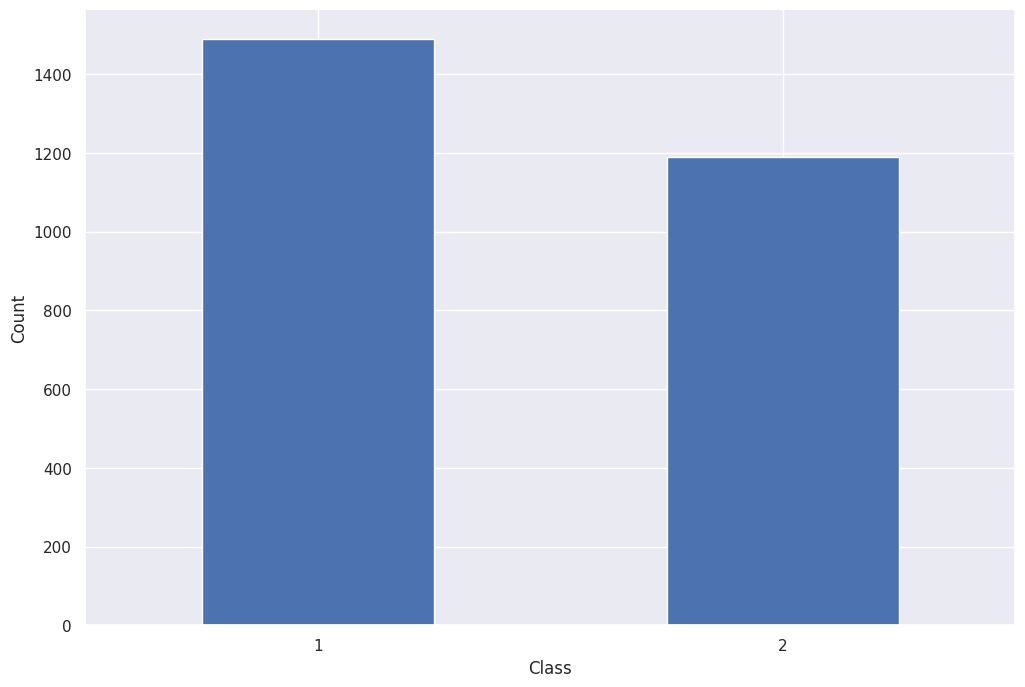

In [ ]:

y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

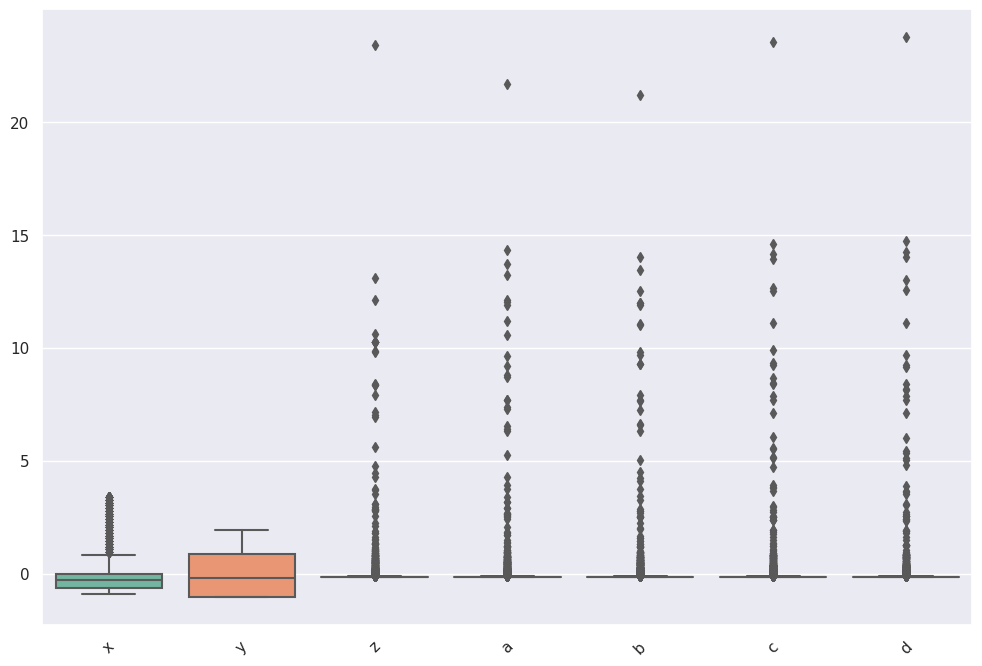

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


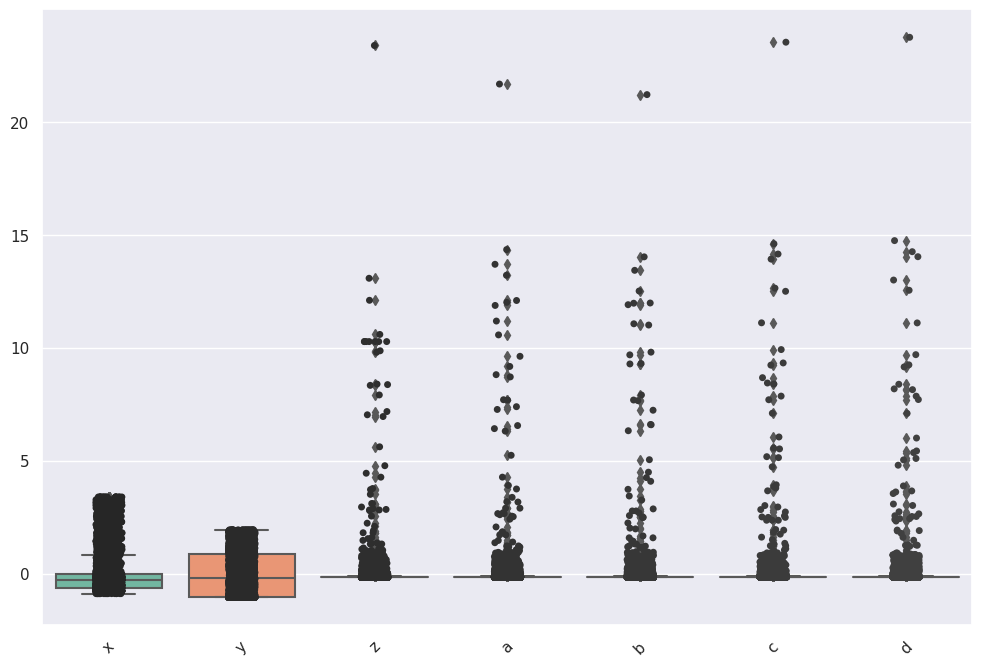

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

In [ ]:
df.describe()

,x,y,z,a,b,c,d
count,2678.000000,2.678000e+03,2678.000000,2.678000e+03,2.678000e+03,2.678000e+03,2678.000000
mean,0.000000,-8.490429e-17,0.000000,-1.061304e-17,2.122607e-17,1.061304e-17,0.000000
std,1.000187,1.000187e+00,1.000187,1.000187e+00,1.000187e+00,1.000187e+00,1.000187
min,-0.886591,-1.049458e+00,-0.169933,-1.624967e-01,-1.634823e-01,-1.553579e-01,-0.154453
25%,-0.642045,-1.049458e+00,-0.167676,-1.604491e-01,-1.613600e-01,-1.539593e-01,-0.153065
50%,-0.275228,-1.956725e-01,-0.162987,-1.560670e-01,-1.572161e-01,-1.502257e-01,-0.149459
75%,-0.030682,8.715597e-01,-0.145863,-1.400433e-01,-1.418382e-01,-1.389142e-01,-0.137531
max,3.392951,1.938792e+00,23.388393,2.168007e+01,2.121242e+01,2.353423e+01,23.750614


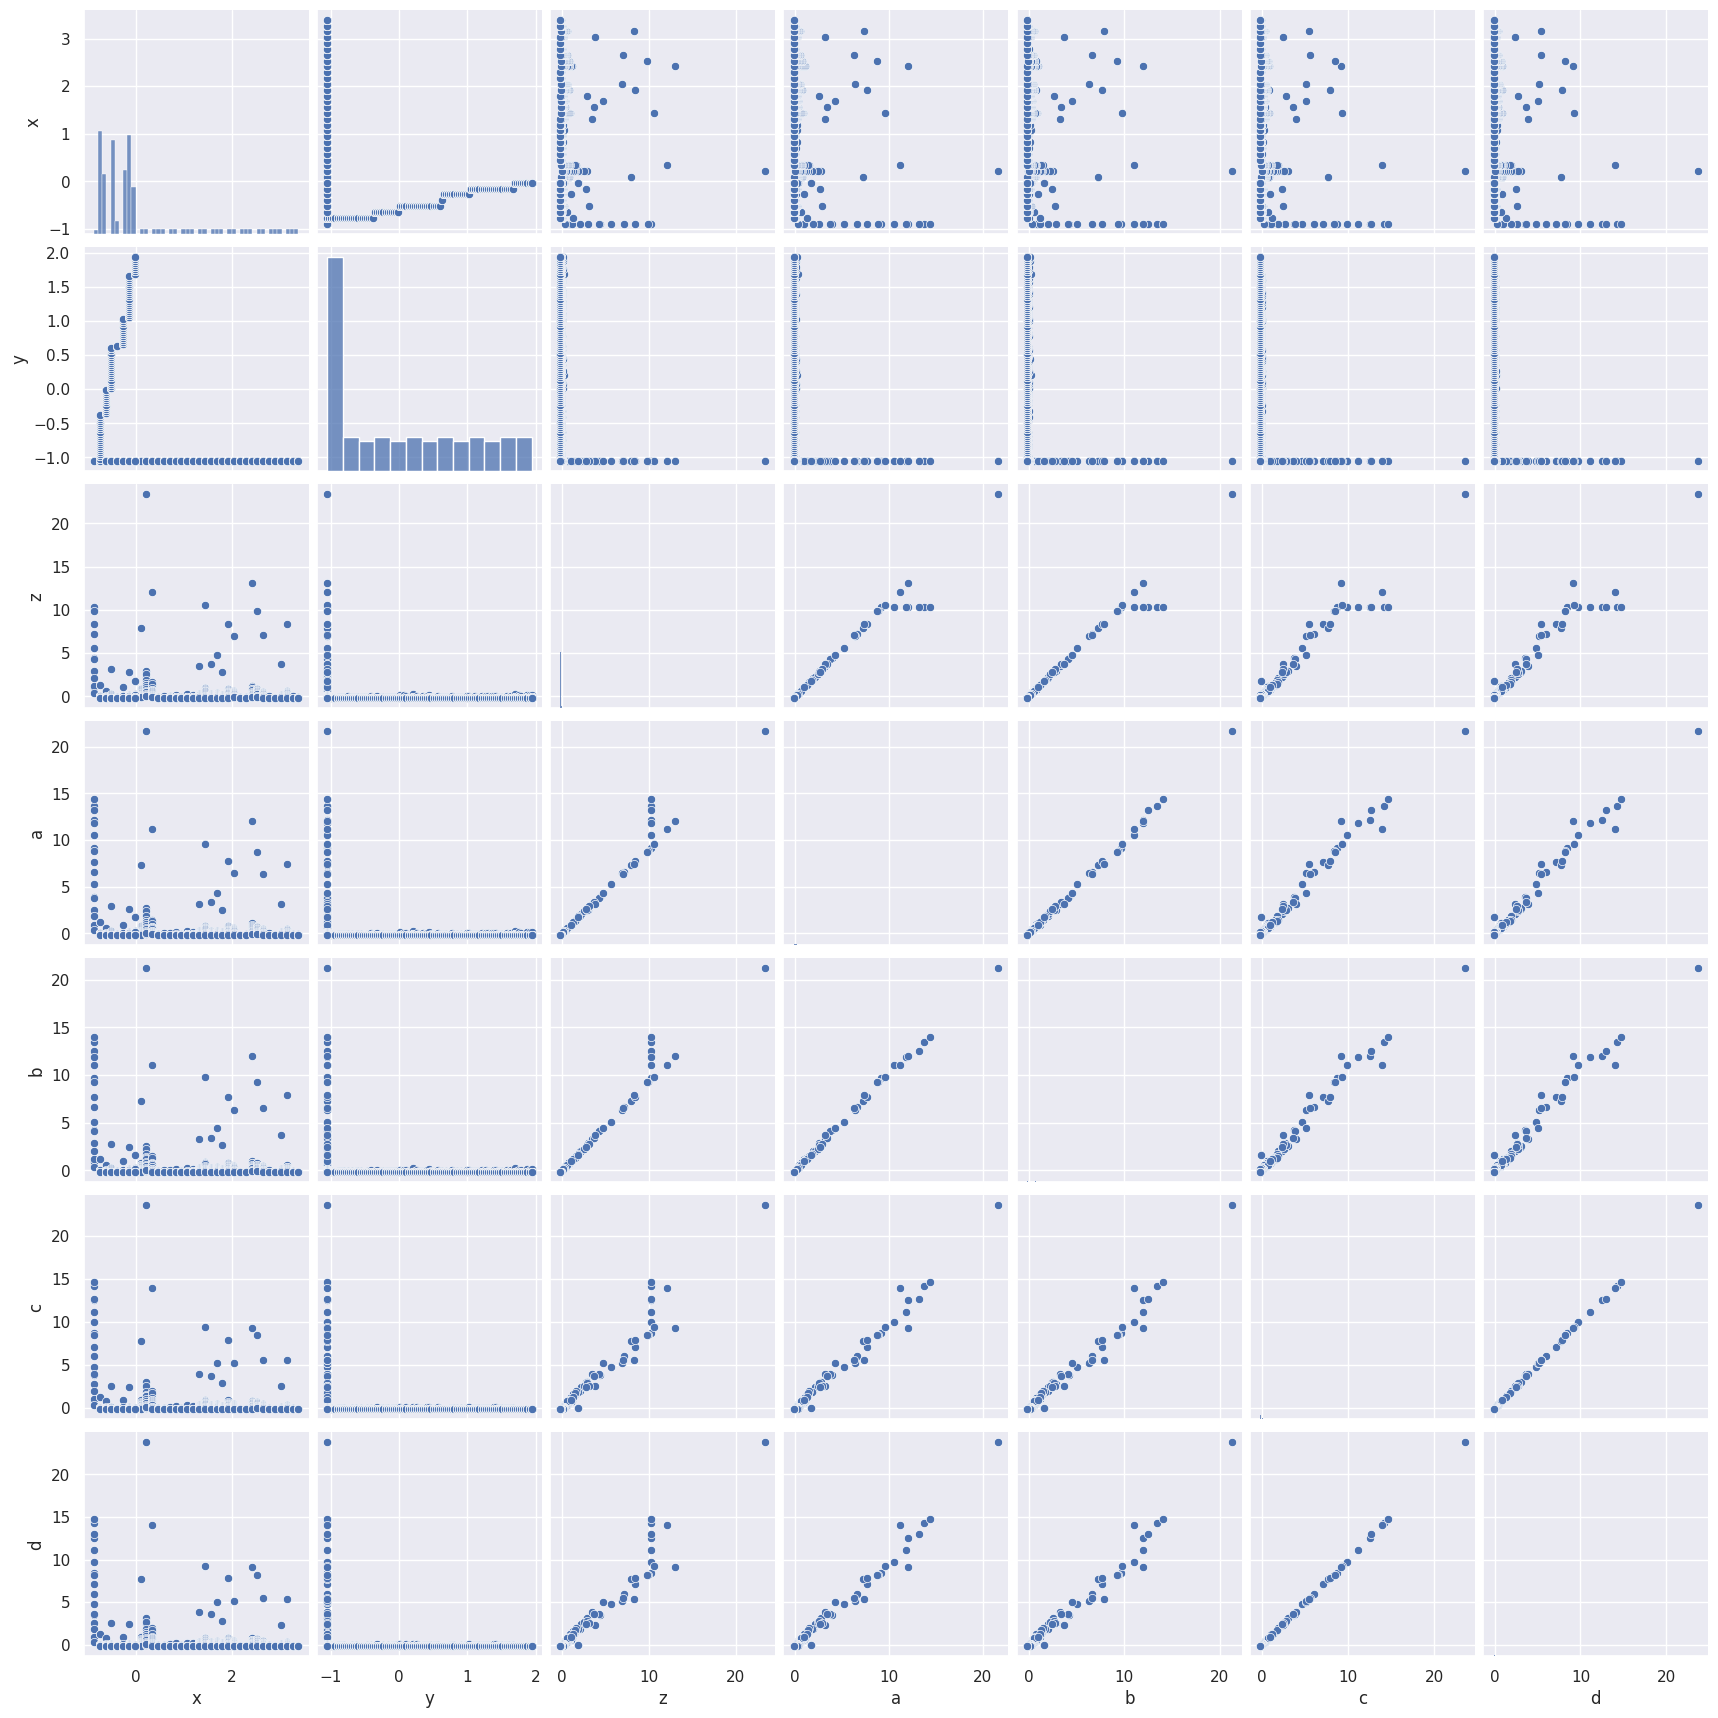

In [ ]:
sns.pairplot(df)

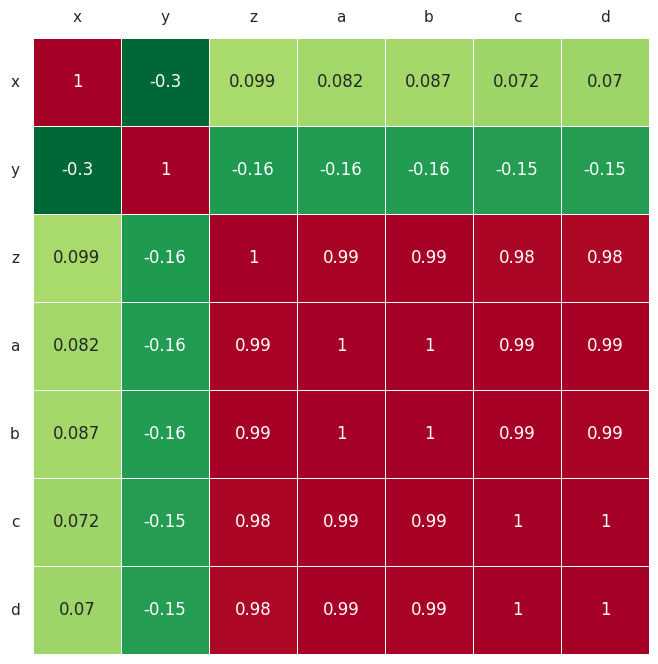

In [ ]:

dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')


Text(0, 0.5, 'Z2')

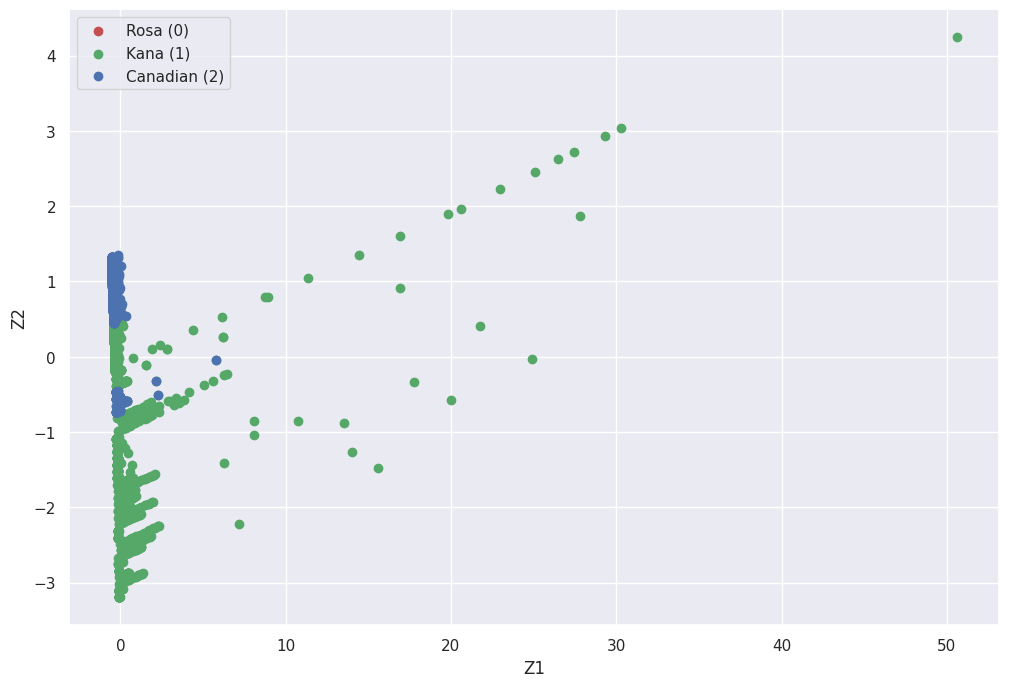

In [ ]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')


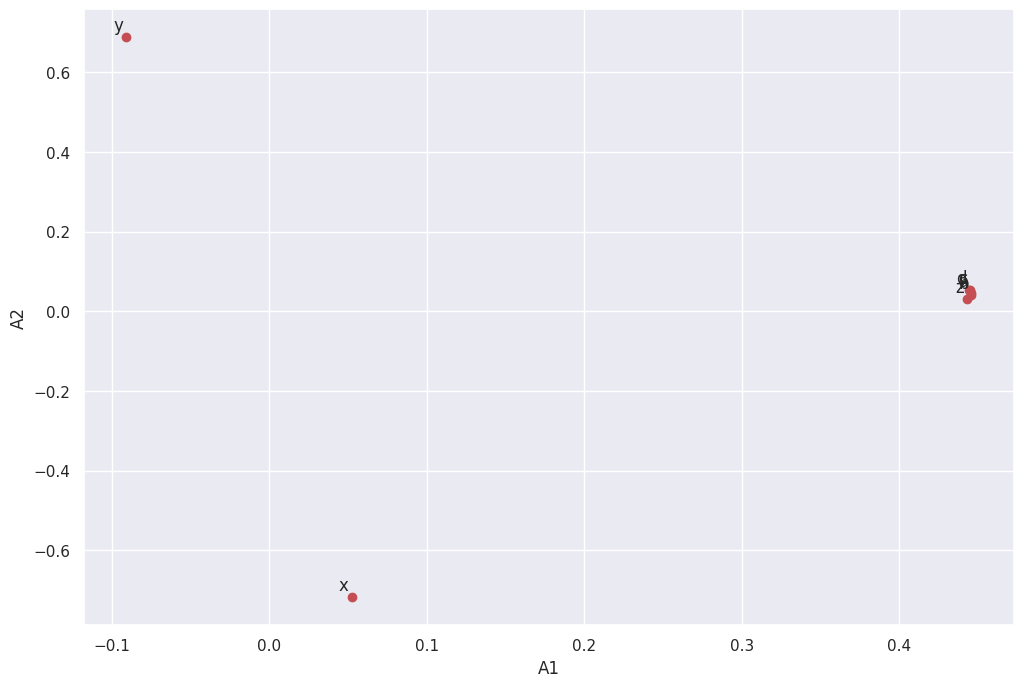

In [ ]:
A = pca.components_.T
plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


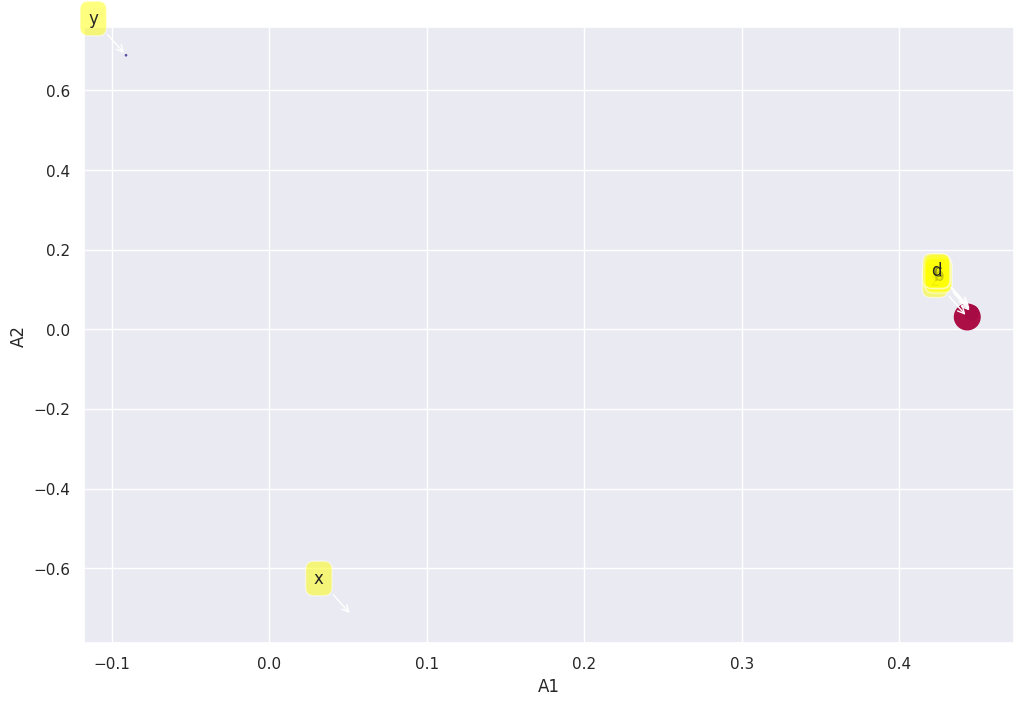

In [ ]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

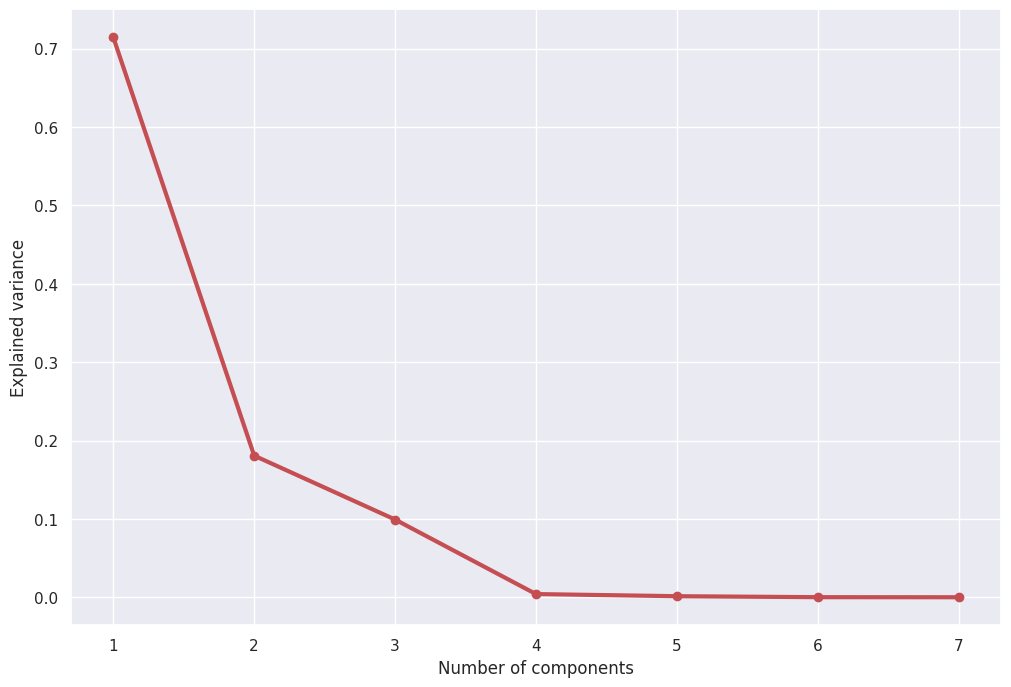

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

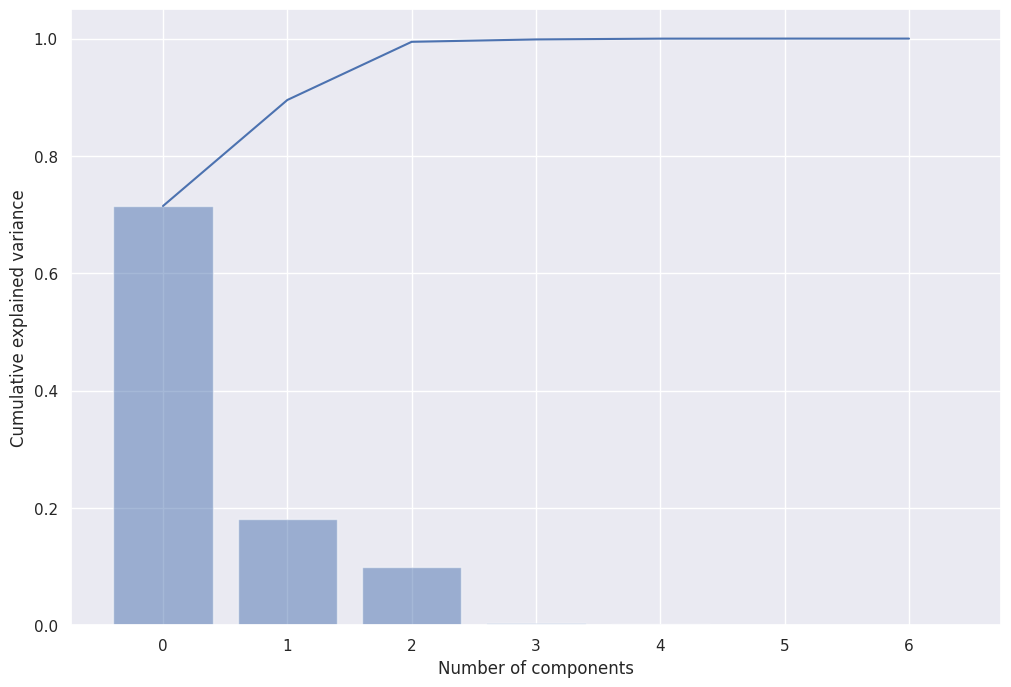

In [ ]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (71.5%)',
 '1': 'PC 2 (18.1%)',
 '2': 'PC 3 (9.9%)',
 '3': 'PC 4 (0.4%)',
 '4': 'PC 5 (0.1%)',
 '5': 'PC 6 (0.0%)',
 '6': 'PC 7 (0.0%)'}

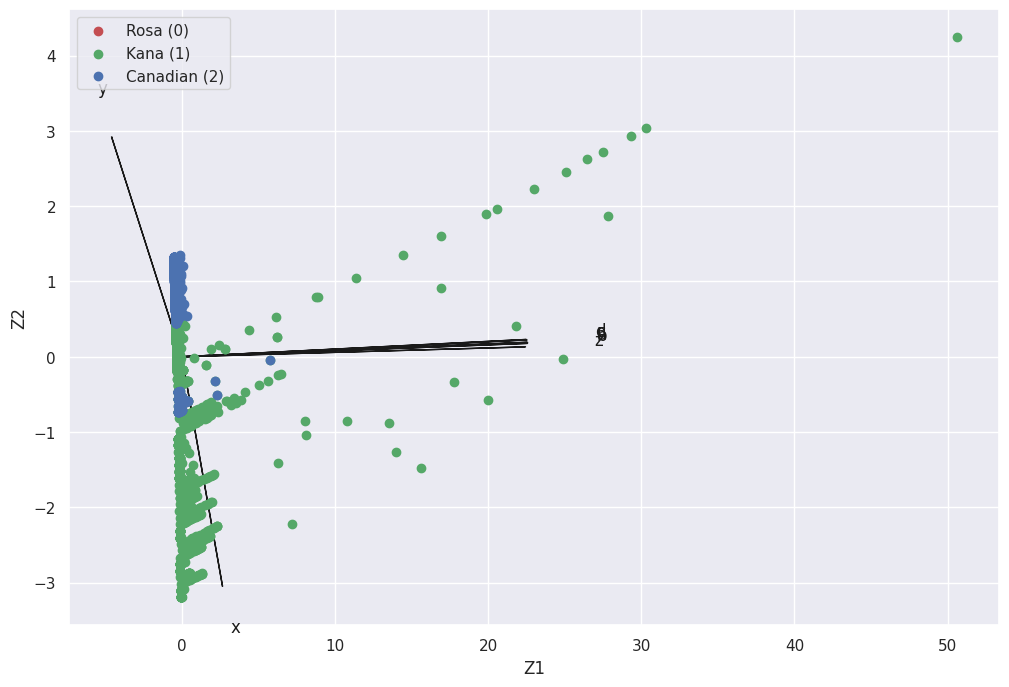

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')


In [ ]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.6 MB/s eta 0:00:00


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

    PC feature   loading  type
0  PC1       a  0.445762  best
1  PC2       x -0.718228  best
2  PC3       y  0.719777  best
3  PC1       z  0.443086  weak
4  PC1       b  0.445666  weak
5  PC1       c  0.444822  weak
6  PC1       d  0.444413  weak


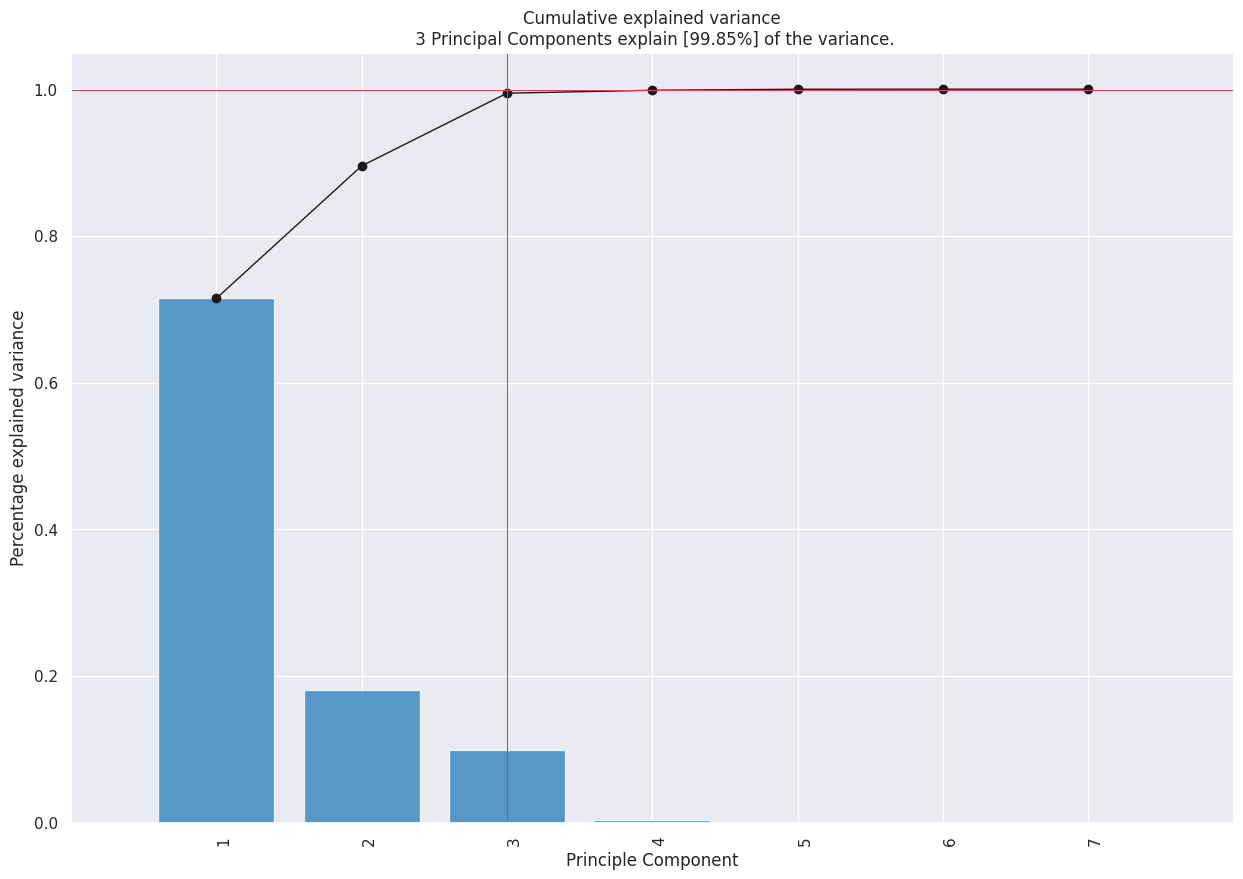

In [ ]:
model.plot();

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


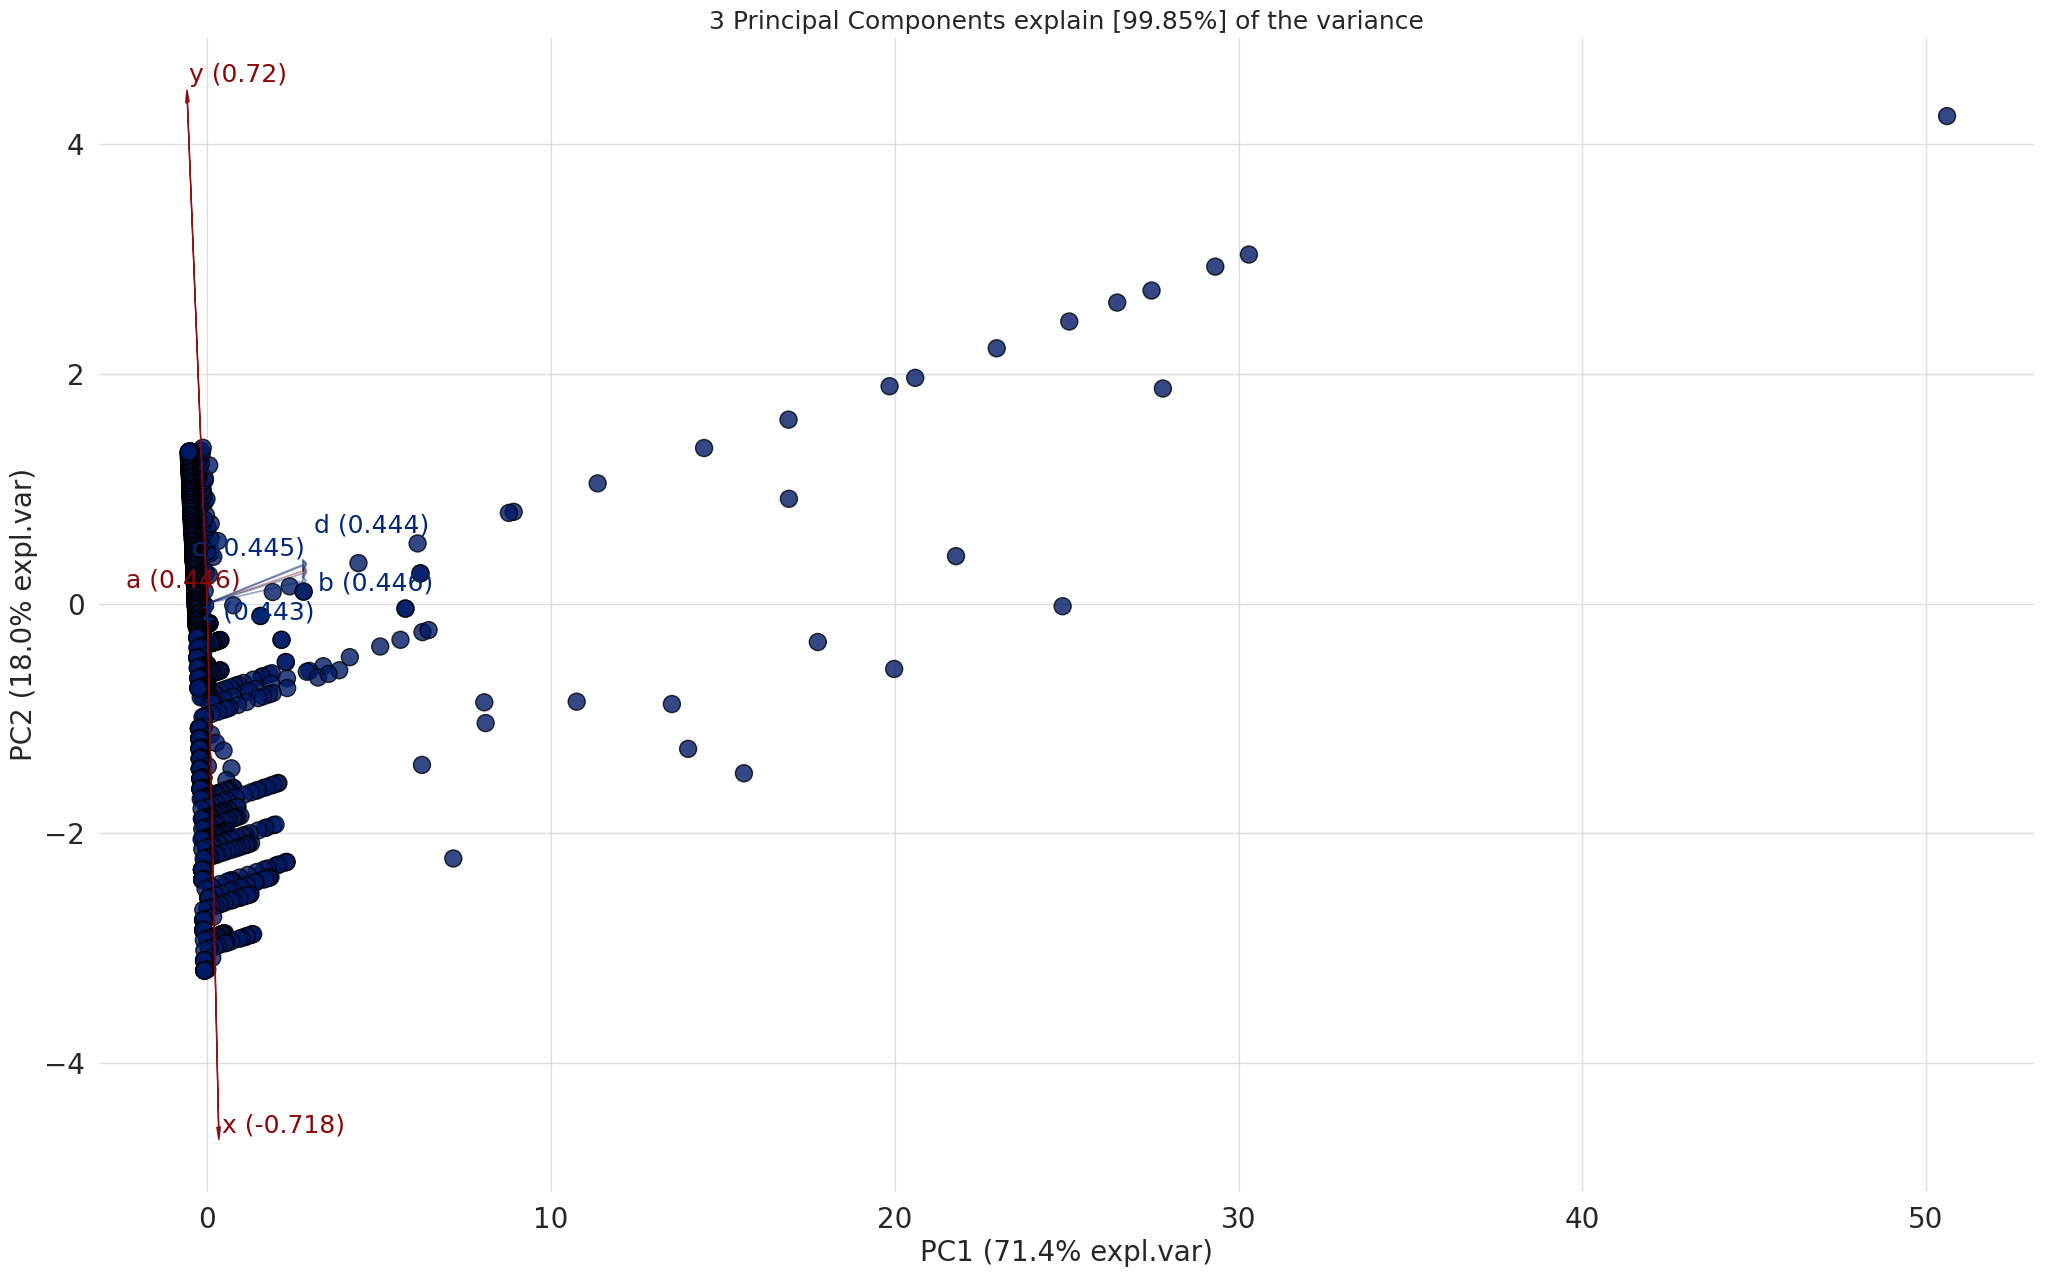

In [ ]:
ax = model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.85%] of the variance'}, xlabel='PC1 (71.4% expl.var)', ylabel='PC2 (18.0% expl.var)'>)

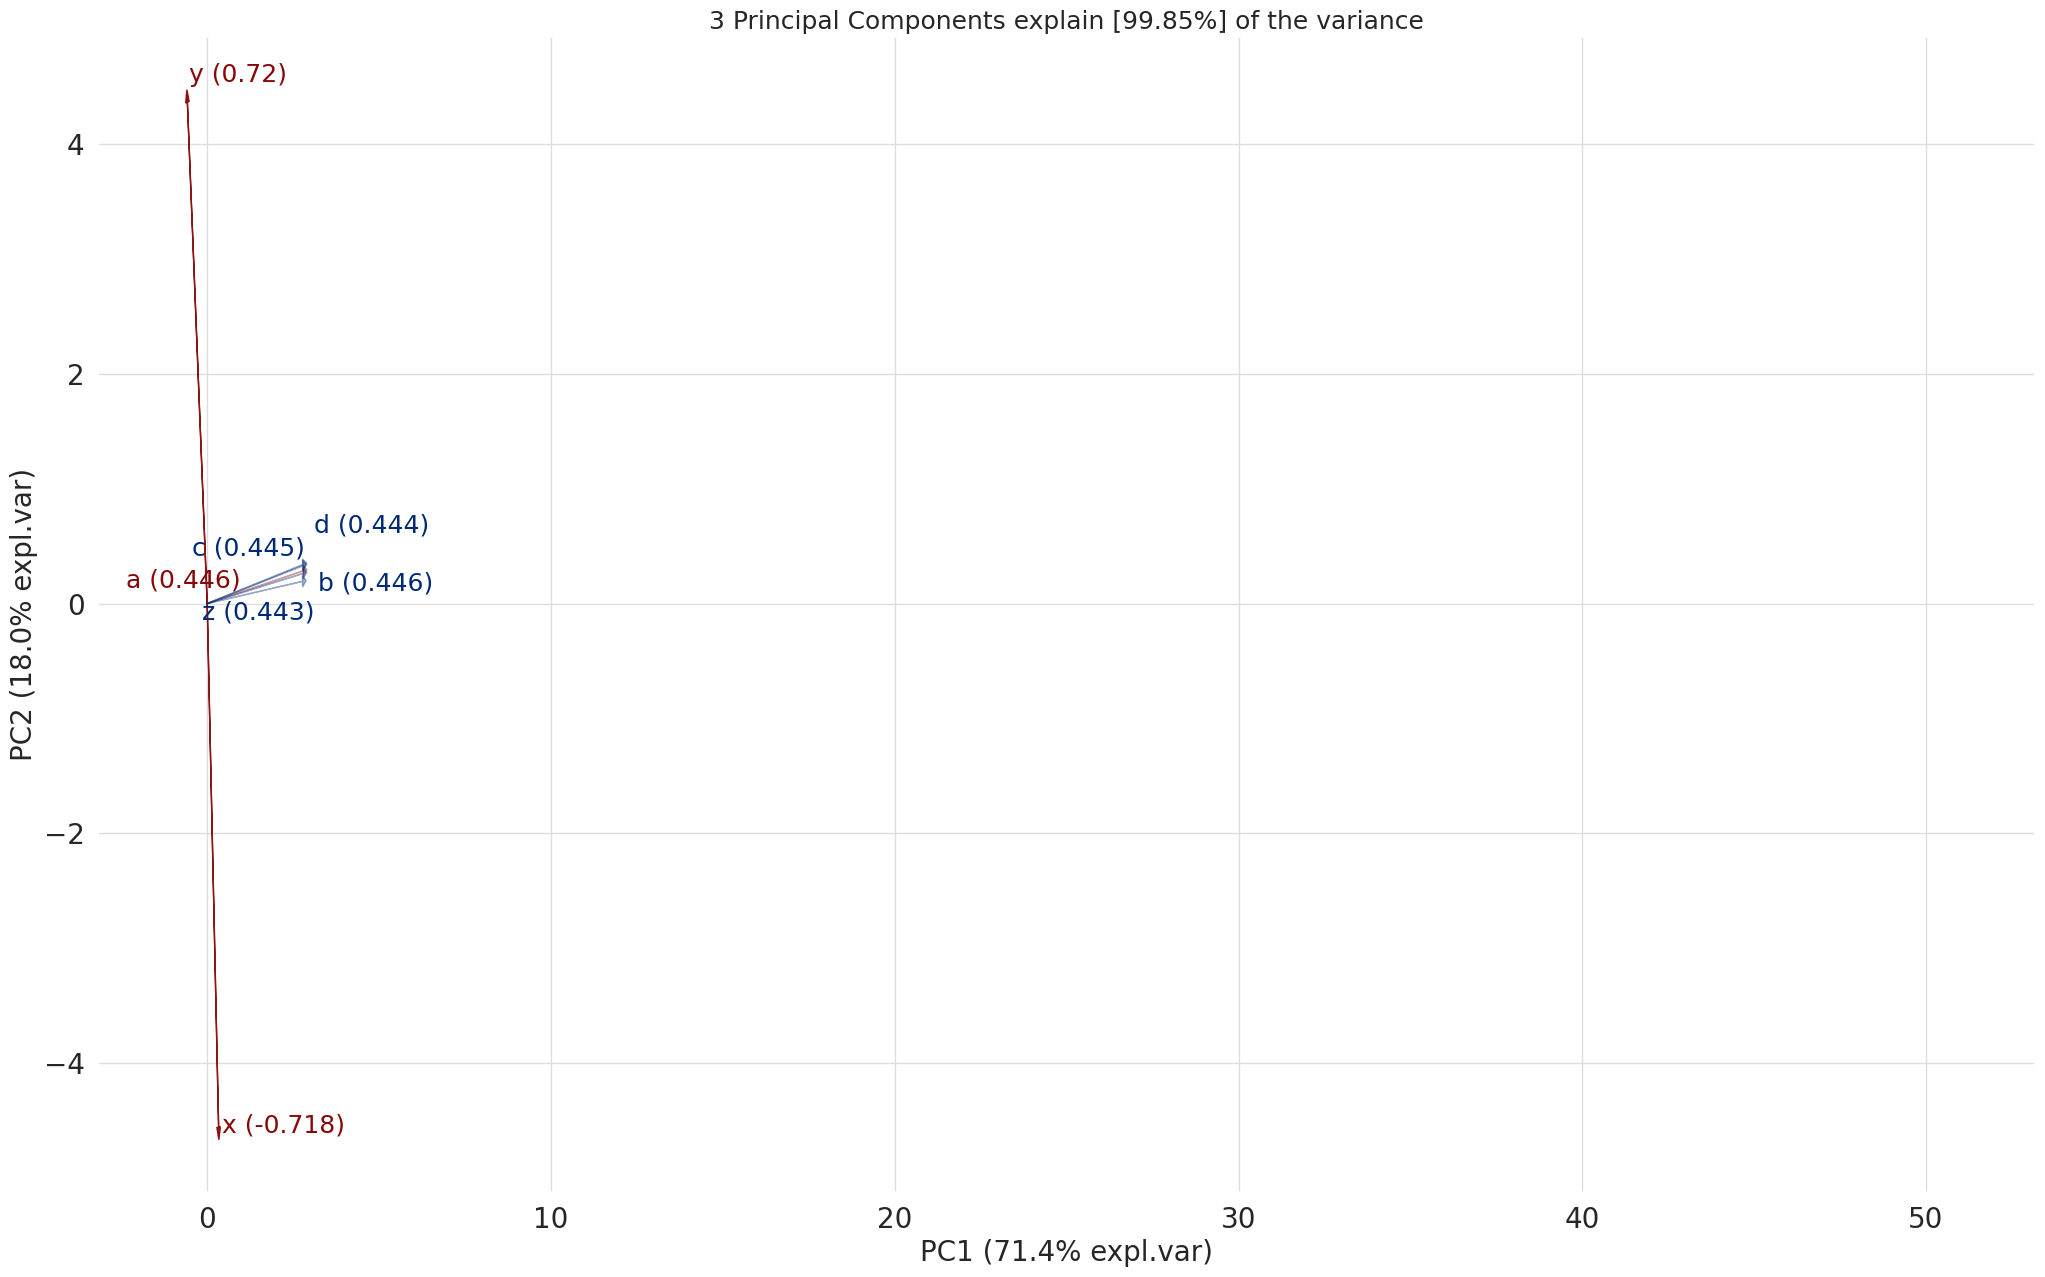

In [ ]:
model.biplot(cmap=None, label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


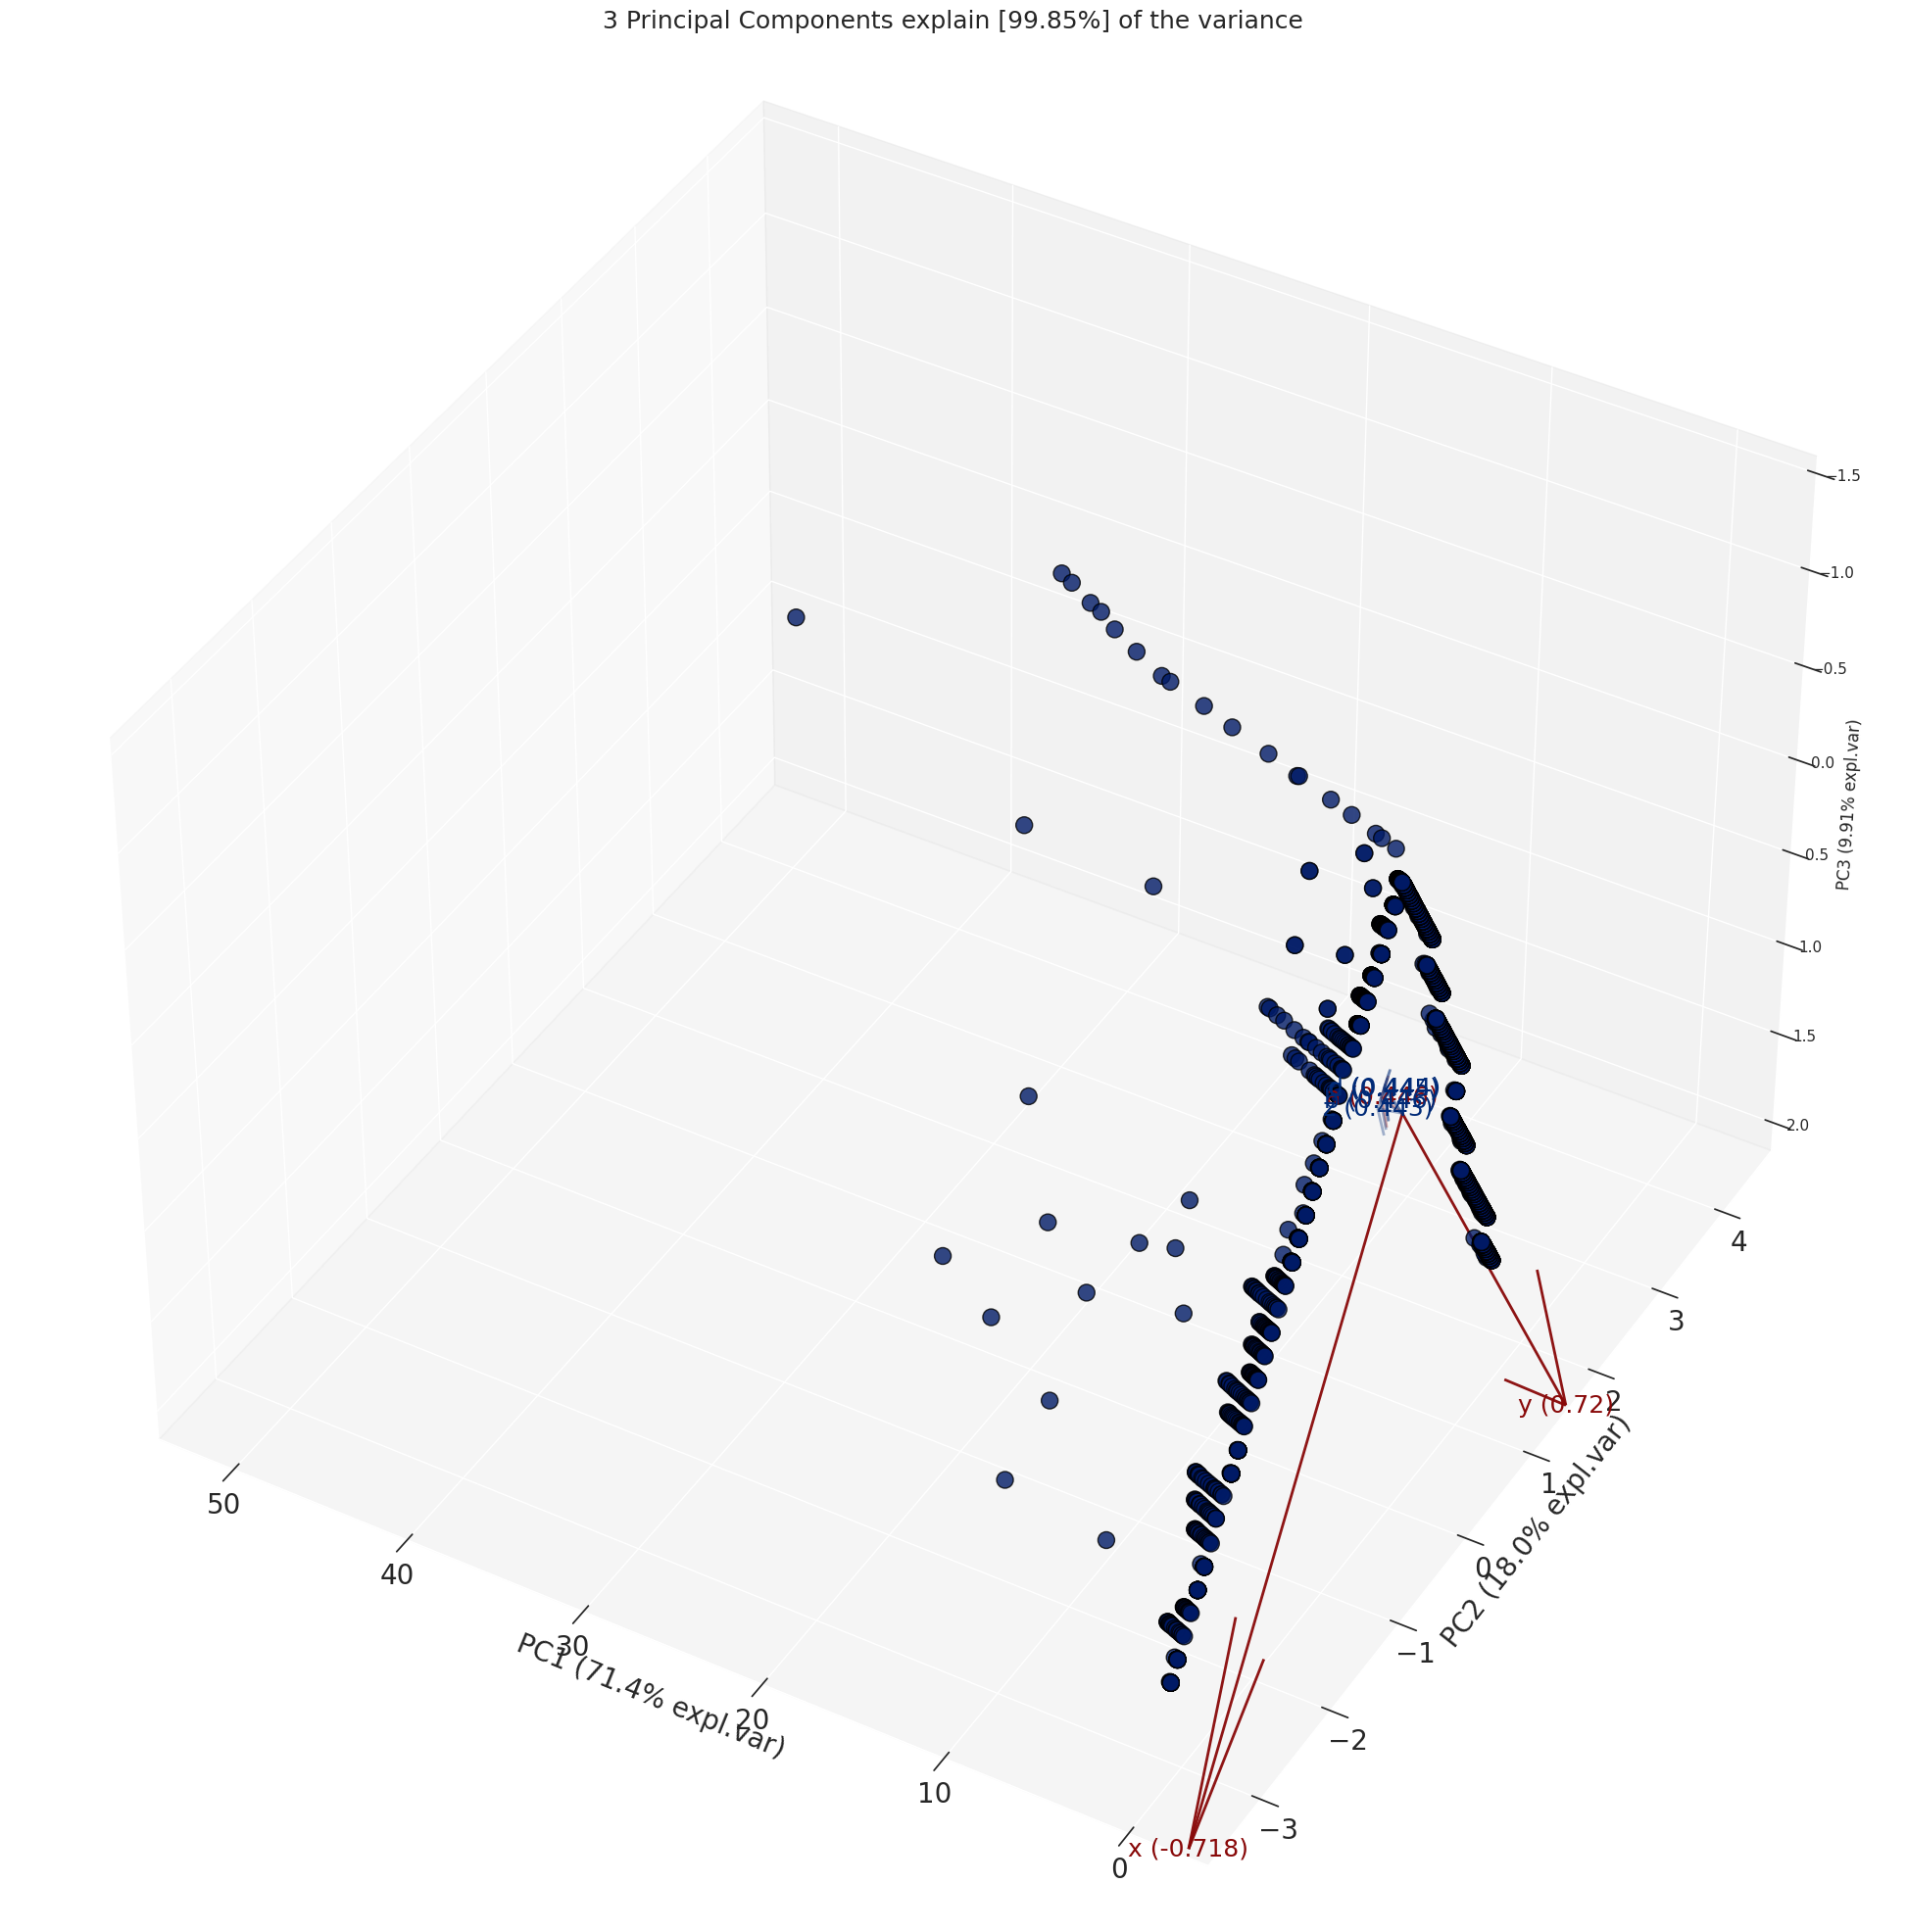

In [ ]:
ax = model.biplot3d(legend=False)

AttributeError: ignored

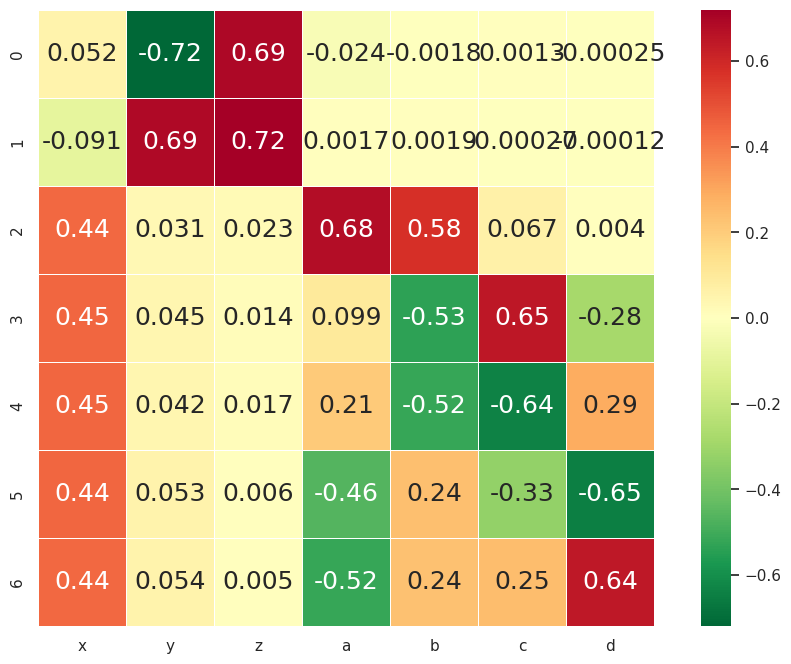

In [ ]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

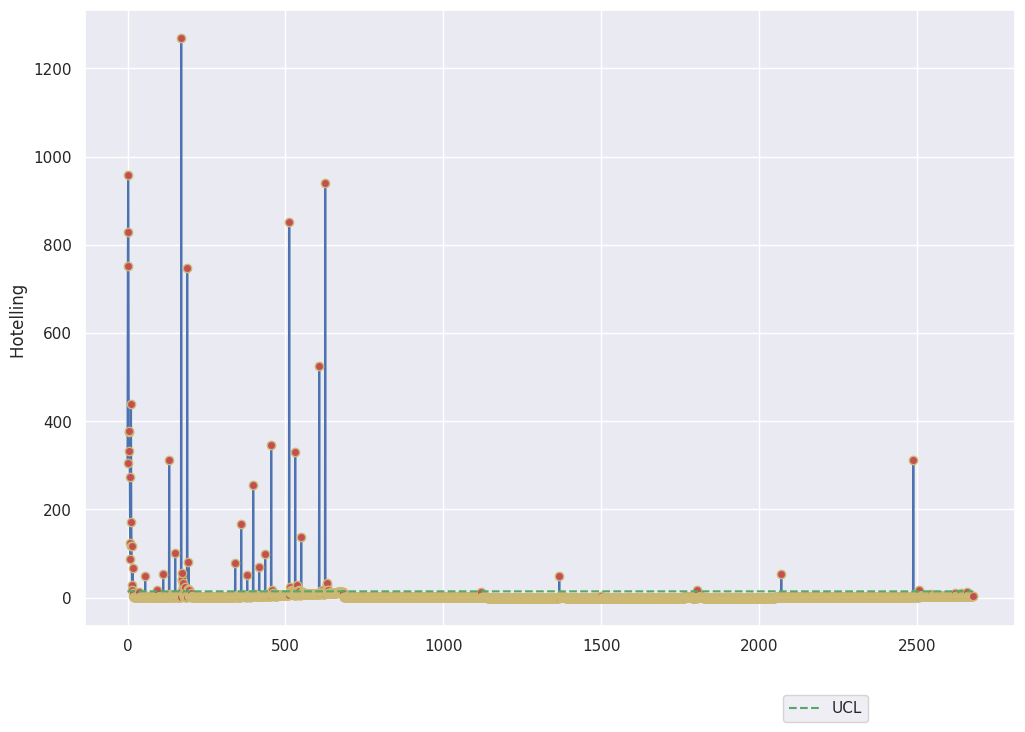

In [ ]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling ')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [ ]:
print(np.argwhere(Tsquare>UCL))

[[   0]
 [   1]
 [   2]
 [   3]
 [   4]
 [   5]
 [   6]
 [   7]
 [   8]
 [   9]
 [  10]
 [  11]
 [  12]
 [  13]
 [  14]
 [  15]
 [  16]
 [  56]
 [  94]
 [ 113]
 [ 132]
 [ 151]
 [ 170]
 [ 171]
 [ 172]
 [ 173]
 [ 174]
 [ 175]
 [ 177]
 [ 182]
 [ 189]
 [ 190]
 [ 191]
 [ 192]
 [ 193]
 [ 195]
 [ 196]
 [ 341]
 [ 360]
 [ 379]
 [ 398]
 [ 417]
 [ 436]
 [ 455]
 [ 459]
 [ 512]
 [ 516]
 [ 517]
 [ 531]
 [ 535]
 [ 536]
 [ 537]
 [ 543]
 [ 544]
 [ 550]
 [ 607]
 [ 615]
 [ 626]
 [ 630]
 [ 631]
 [ 632]
 [ 633]
 [ 634]
 [1367]
 [1804]
 [2070]
 [2488]
 [2507]]


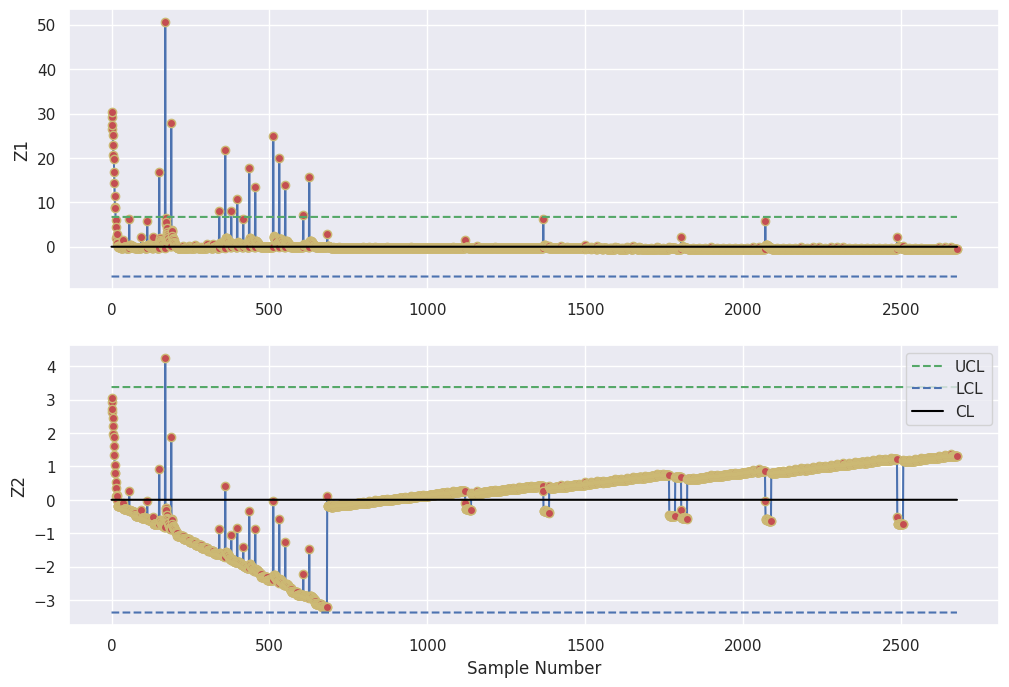

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('Z1')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('Z2')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

In [ ]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[[  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [151]
 [170]
 [189]
 [341]
 [360]
 [379]
 [398]
 [436]
 [455]
 [512]
 [531]
 [550]
 [607]
 [626]]
[]
[[170]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 1874
Test Dataset Size: 804


DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      0.988     0.372     0.541       446
           2      0.560     0.994     0.716       358

    accuracy                          0.649       804
   macro avg      0.774     0.683     0.629       804
weighted avg      0.797     0.649     0.619       804



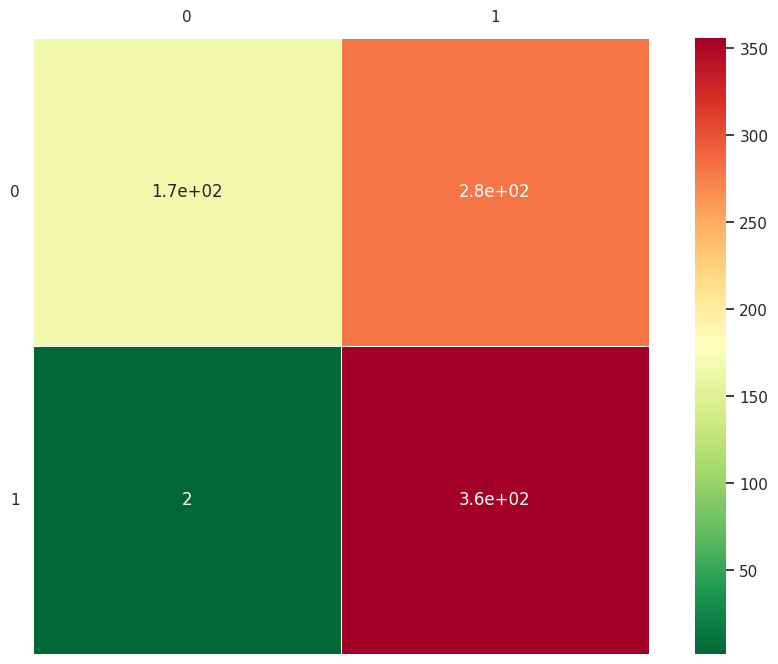

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      0.969     0.417     0.583       446
           2      0.575     0.983     0.726       358

    accuracy                          0.669       804
   macro avg      0.772     0.700     0.654       804
weighted avg      0.793     0.669     0.647       804



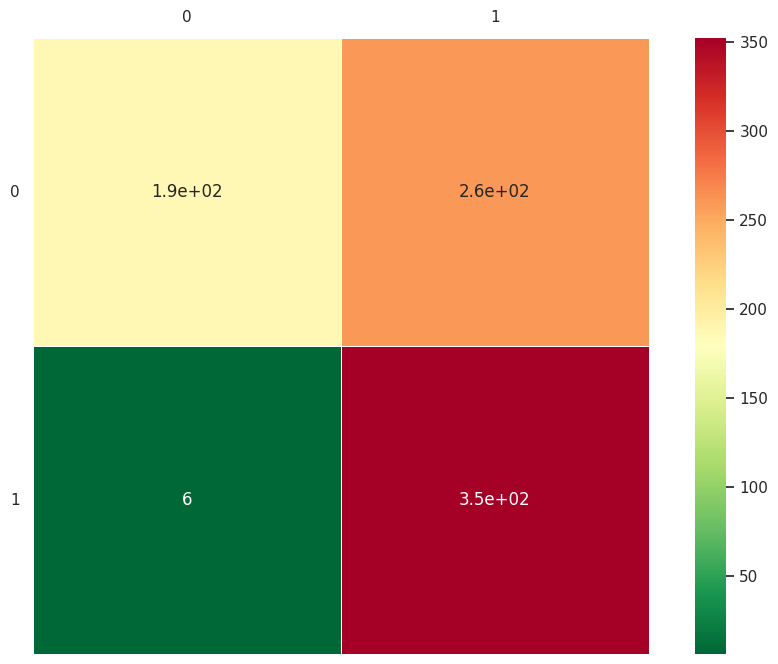

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      0.907     0.480     0.628       446
           2      0.592     0.939     0.726       358

    accuracy                          0.684       804
   macro avg      0.749     0.709     0.677       804
weighted avg      0.766     0.684     0.671       804



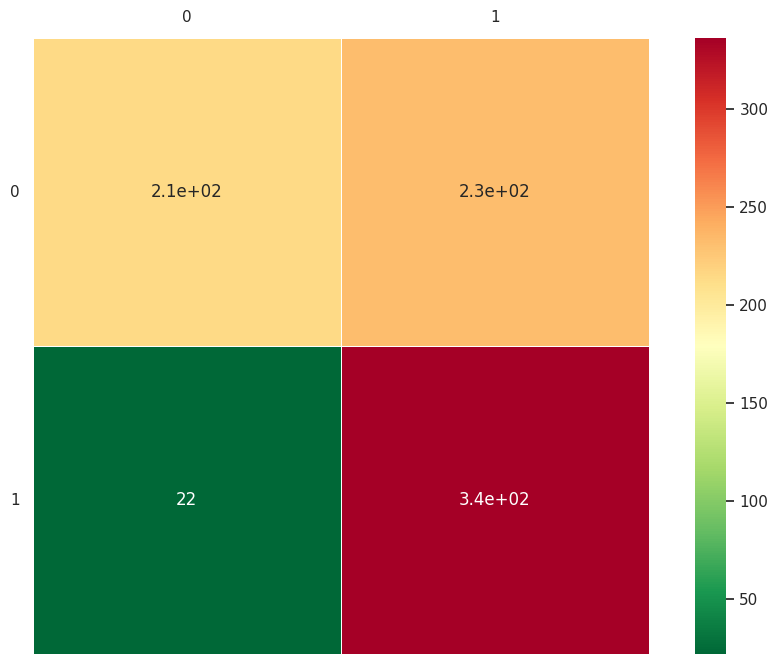

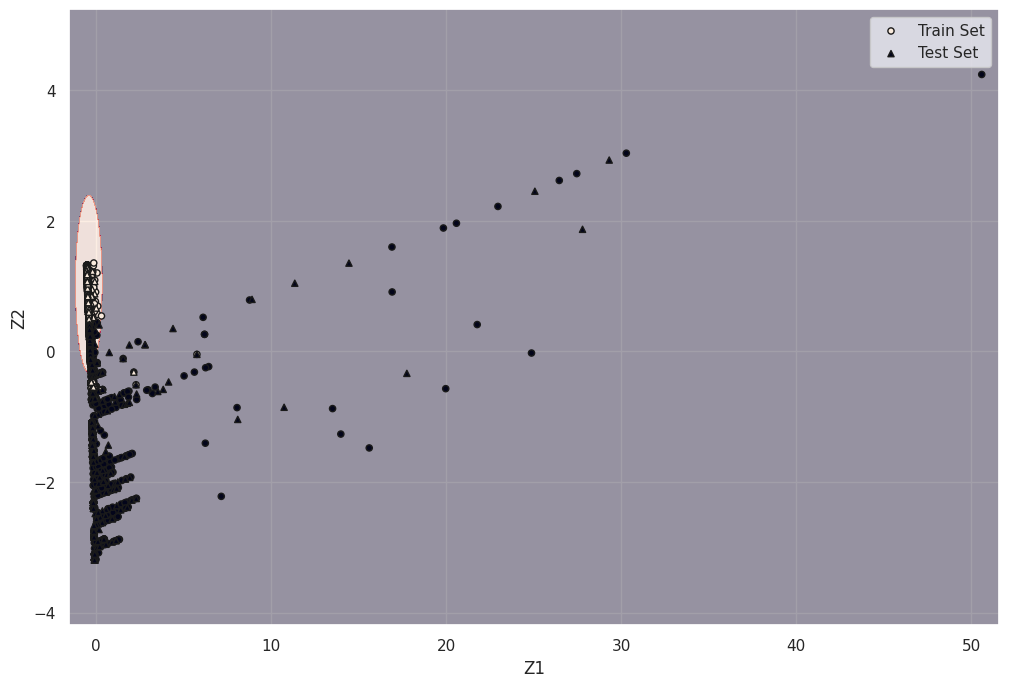

(array([  0,   2,   7,  11,  17,  19,  21,  25,  27,  30,  32,  39,  42,
        43,  44,  45,  46,  49,  52,  56,  61,  63,  65,  67,  68,  71,
        72,  76,  80,  81,  87,  88,  93,  96, 100, 107, 109, 110, 116,
       118, 120, 129, 130, 132, 135, 140, 141, 142, 143, 147, 148, 150,
       151, 158, 168, 171, 172, 183, 190, 191, 192, 194, 195, 196, 198,
       201, 203, 205, 208, 212, 215, 221, 225, 227, 230, 234, 235, 236,
       237, 239, 246, 247, 248, 249, 253, 256, 261, 264, 266, 267, 268,
       278, 280, 281, 282, 285, 287, 291, 299, 301, 307, 308, 310, 312,
       320, 321, 322, 328, 329, 333, 338, 339, 340, 342, 344, 349, 352,
       361, 365, 366, 367, 368, 369, 370, 376, 379, 383, 385, 392, 394,
       397, 398, 403, 405, 418, 429, 433, 438, 439, 450, 452, 454, 456,
       459, 464, 466, 469, 476, 477, 479, 480, 484, 486, 496, 499, 505,
       508, 509, 512, 519, 523, 525, 528, 529, 533, 536, 538, 541, 544,
       547, 548, 550, 553, 554, 555, 558, 559, 566, 567, 568, 5

In [ ]:

gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('Z1')
    plt.ylabel('Z2')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

Grid Search Results:
k_full_data: {'n_neighbors': 32}
k_Z: {'n_neighbors': 32}
k_Z12: {'n_neighbors': 32}
                                    0         1         2         3         4
knn_full_data fit_time       0.015757  0.005663  0.005207  0.022340  0.005775
knn_Z  fit_time              0.006419  0.003334  0.010398  0.003345  0.003512
knn_Z12 fit_time             0.002555  0.002580  0.002483  0.002635  0.002329
knn_full_data test_f1_macro  0.970178  0.956464  0.967397  0.967489  0.967422
knn_Z  test_f1_macro         0.970178  0.959153  0.970136  0.967489  0.964730
knn_Z12 test_f1_macro        0.978265  0.959088  0.961906  0.967489  0.967282

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      0.954     0.984     0.969       446
           2      0.980     0.941     0.960       358

    accuracy                          0.965       804
   macro avg      0.967     0.963     0.965       804
weighted avg      0.966     0.965

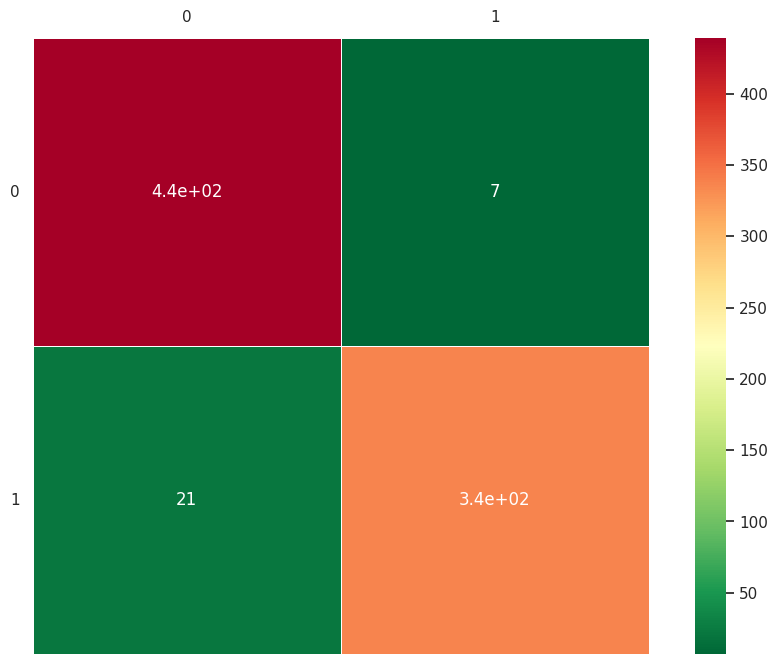

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      0.955     0.989     0.971       446
           2      0.985     0.941     0.963       358

    accuracy                          0.968       804
   macro avg      0.970     0.965     0.967       804
weighted avg      0.968     0.968     0.968       804



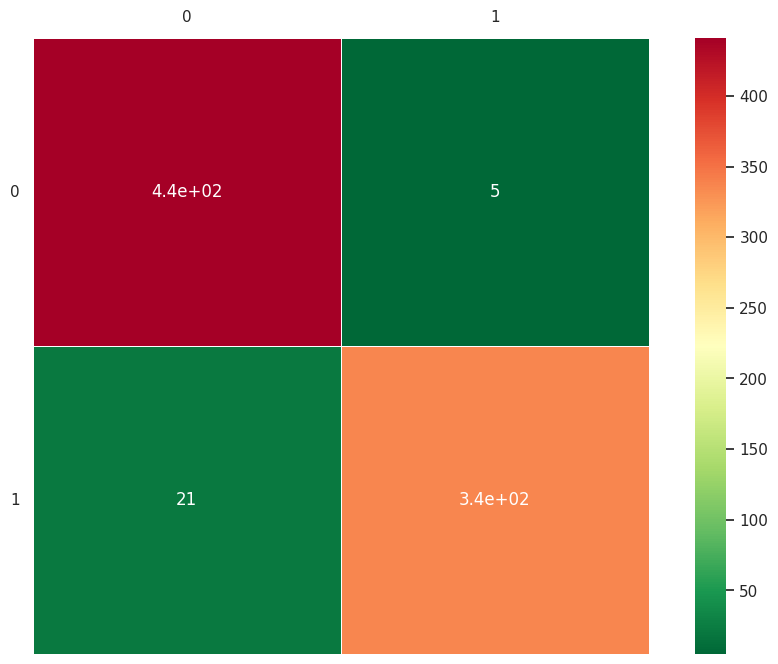

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      0.954     0.987     0.970       446
           2      0.983     0.941     0.961       358

    accuracy                          0.966       804
   macro avg      0.968     0.964     0.966       804
weighted avg      0.967     0.966     0.966       804



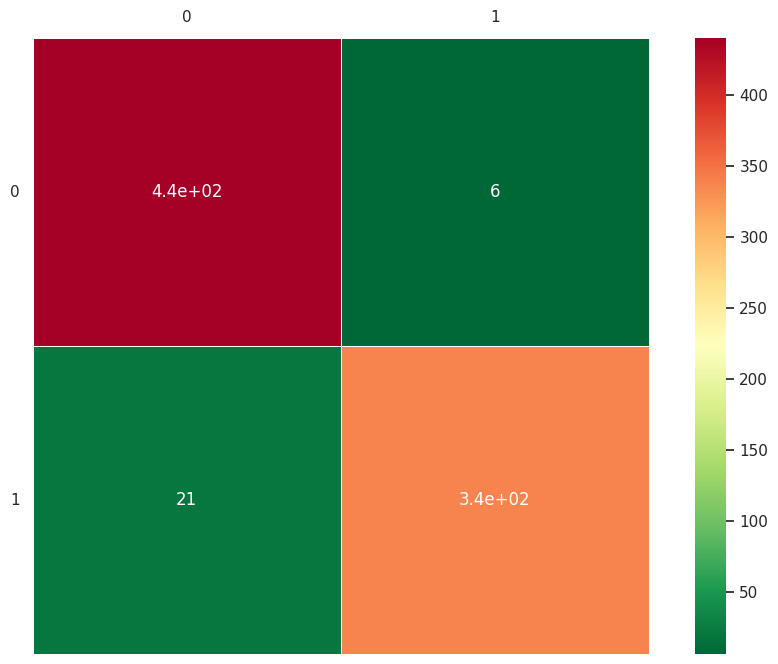

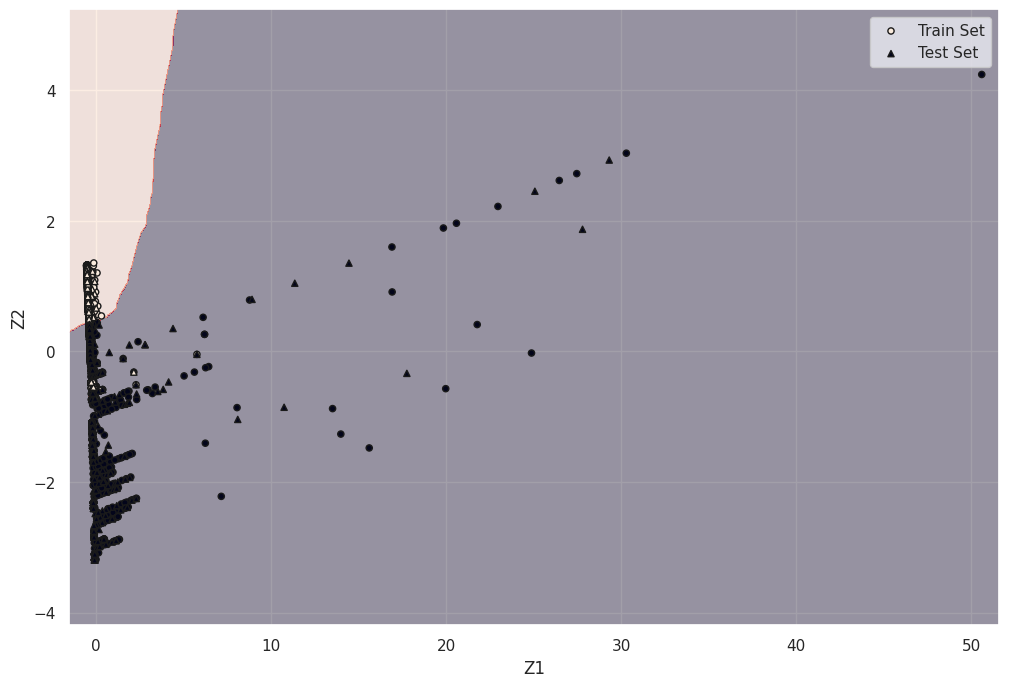

In [ ]:
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('Z1')
    plt.ylabel('Z2')
    plt.legend()
    plt.show()


Grid Search Results:
depth_full_data: {'max_depth': 2}
depth_Z: {'max_depth': 2}
depth_Z12: {'max_depth': 2}
                                   0         1         2         3         4
dt_full_data fit_time       0.007758  0.018499  0.006602  0.007321  0.007859
dt_Z  fit_time              0.005485  0.005366  0.005378  0.005665  0.005305
dt_Z12 fit_time             0.002986  0.002912  0.002975  0.002799  0.002512
dt_full_data test_f1_macro  0.967397  0.959020  0.961784  0.970092  0.961829
dt_Z  test_f1_macro         0.967397  0.959020  0.961784  0.970092  0.959133
dt_Z12 test_f1_macro        0.967397  0.964543  0.961784  0.970092  0.959133

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      0.953     0.996     0.974       446
           2      0.994     0.939     0.966       358

    accuracy                          0.970       804
   macro avg      0.973     0.967     0.970       804
weighted avg      0.971     0.970    

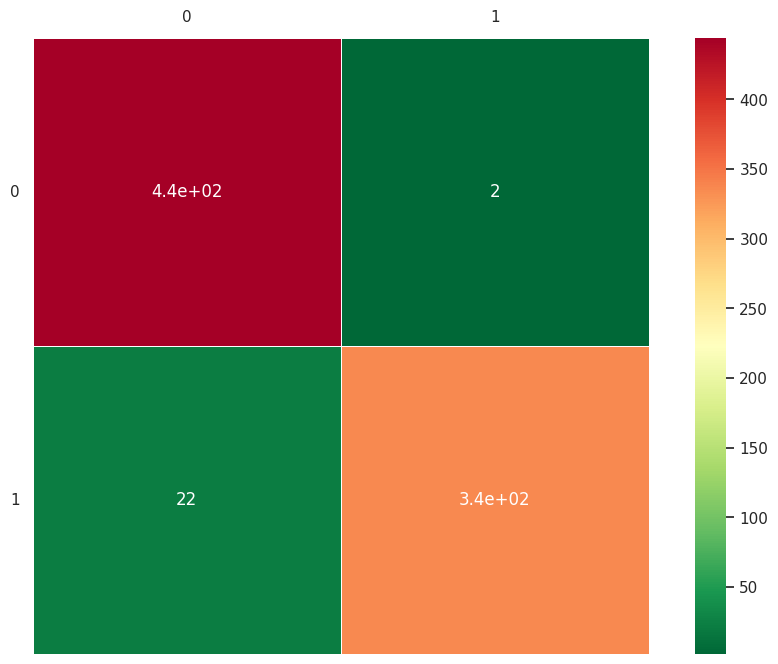

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      0.953     0.996     0.974       446
           2      0.994     0.939     0.966       358

    accuracy                          0.970       804
   macro avg      0.973     0.967     0.970       804
weighted avg      0.971     0.970     0.970       804



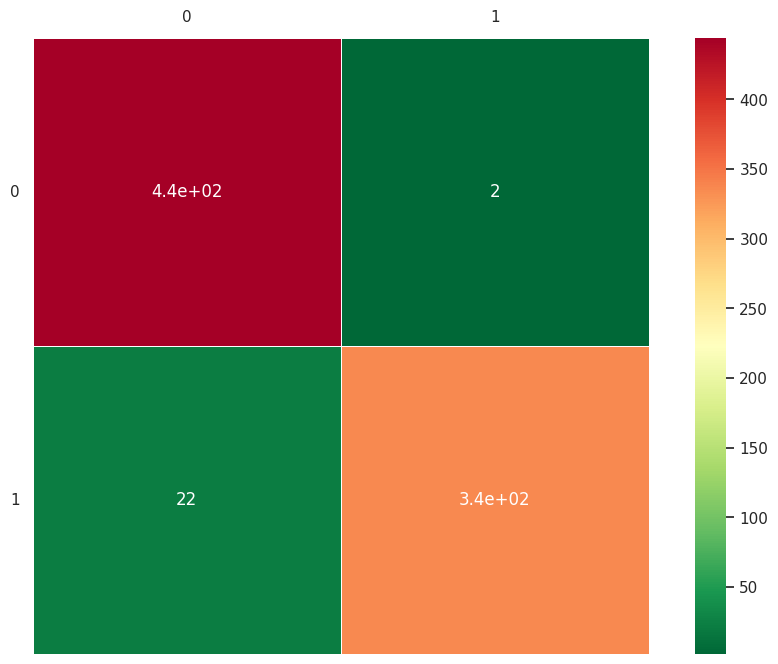

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      0.953     0.996     0.974       446
           2      0.994     0.939     0.966       358

    accuracy                          0.970       804
   macro avg      0.973     0.967     0.970       804
weighted avg      0.971     0.970     0.970       804



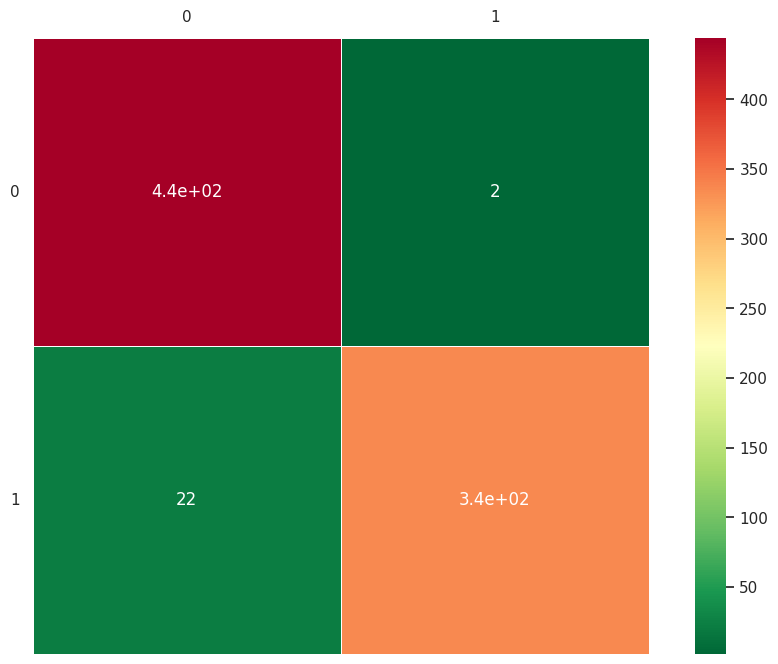

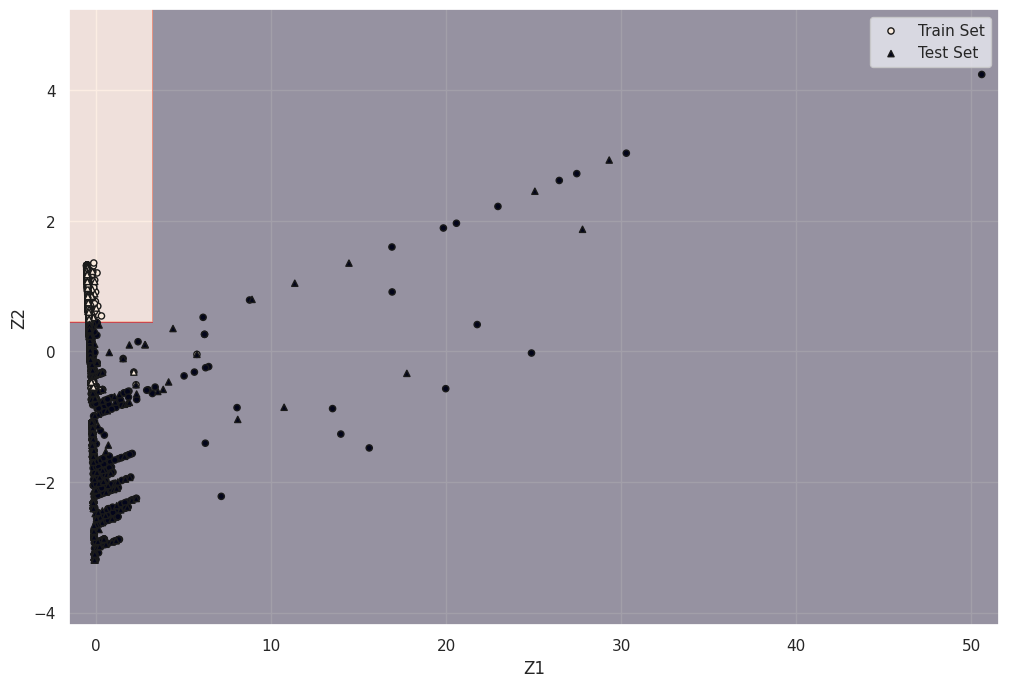

In [ ]:
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('Z1')
    plt.ylabel('Z2')
    plt.legend()
    plt.show()

DATASET: FULL DATA


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


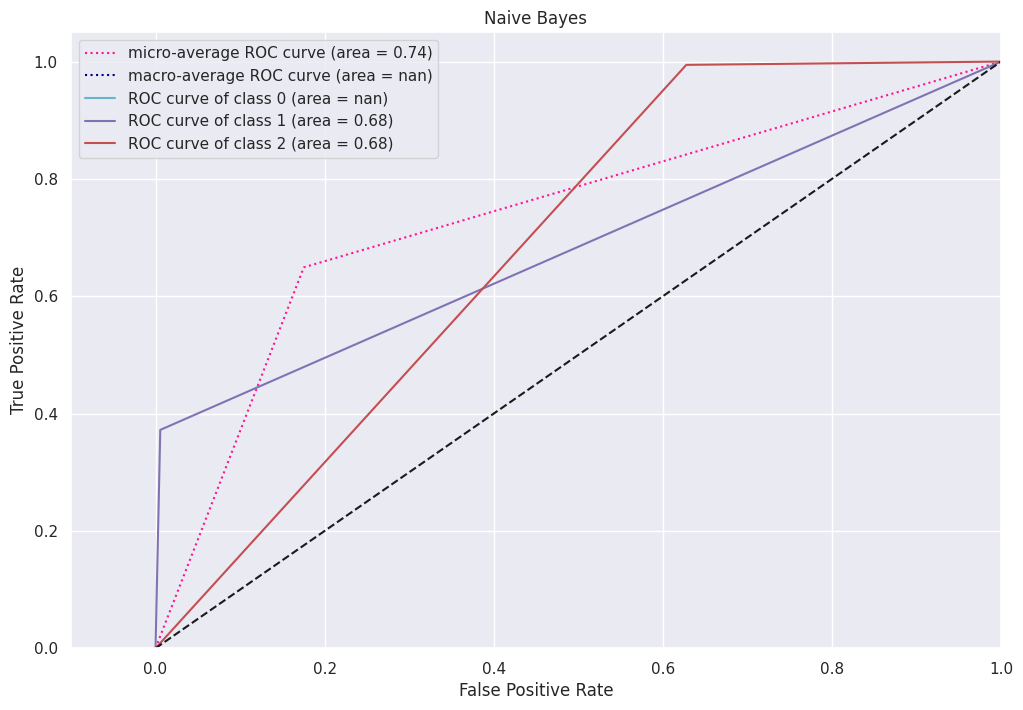

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


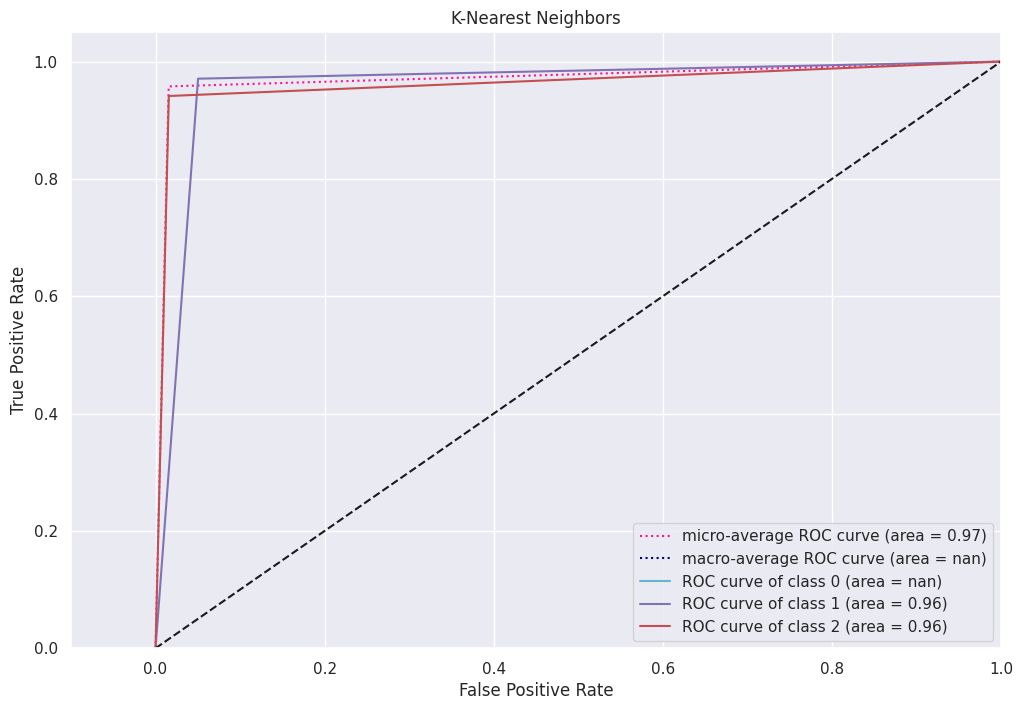

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


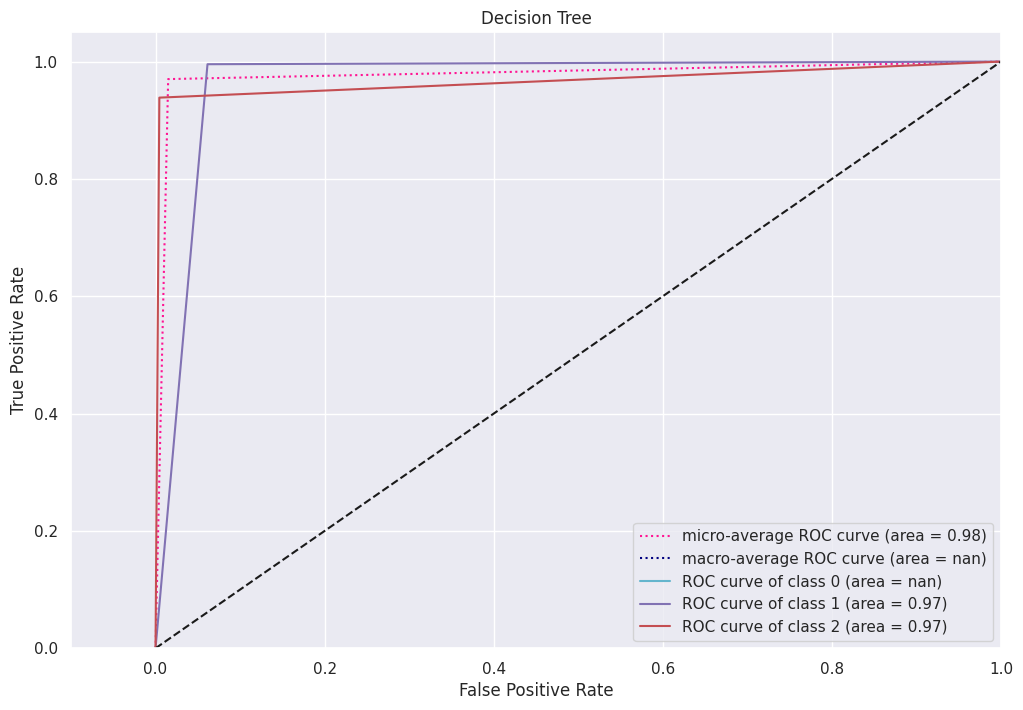

DATASET: Z


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


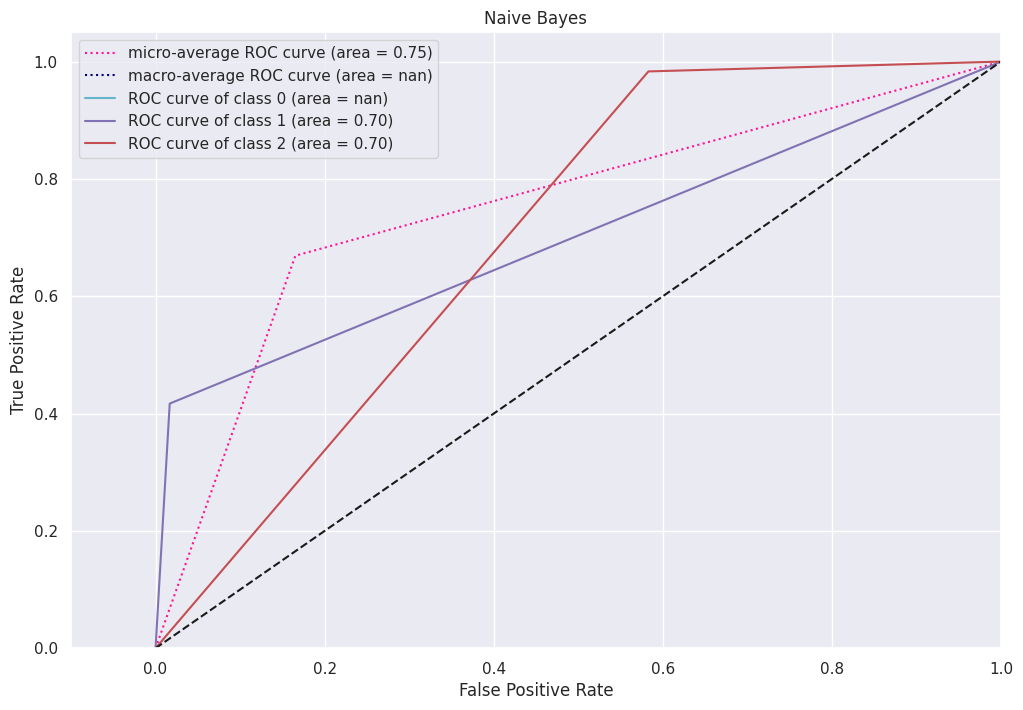

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


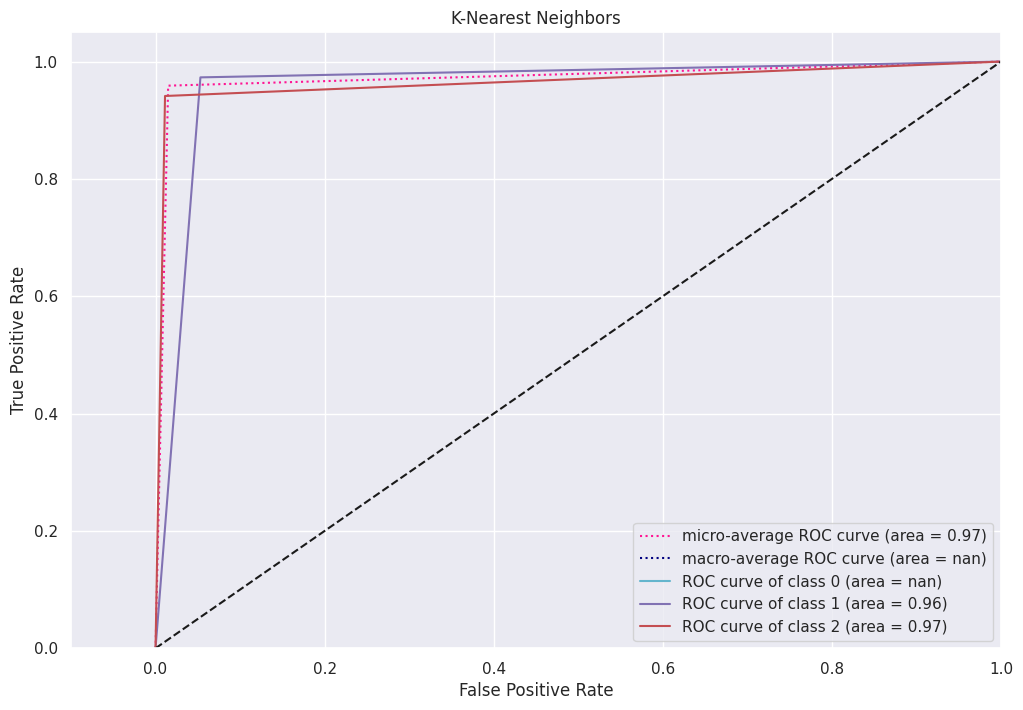

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


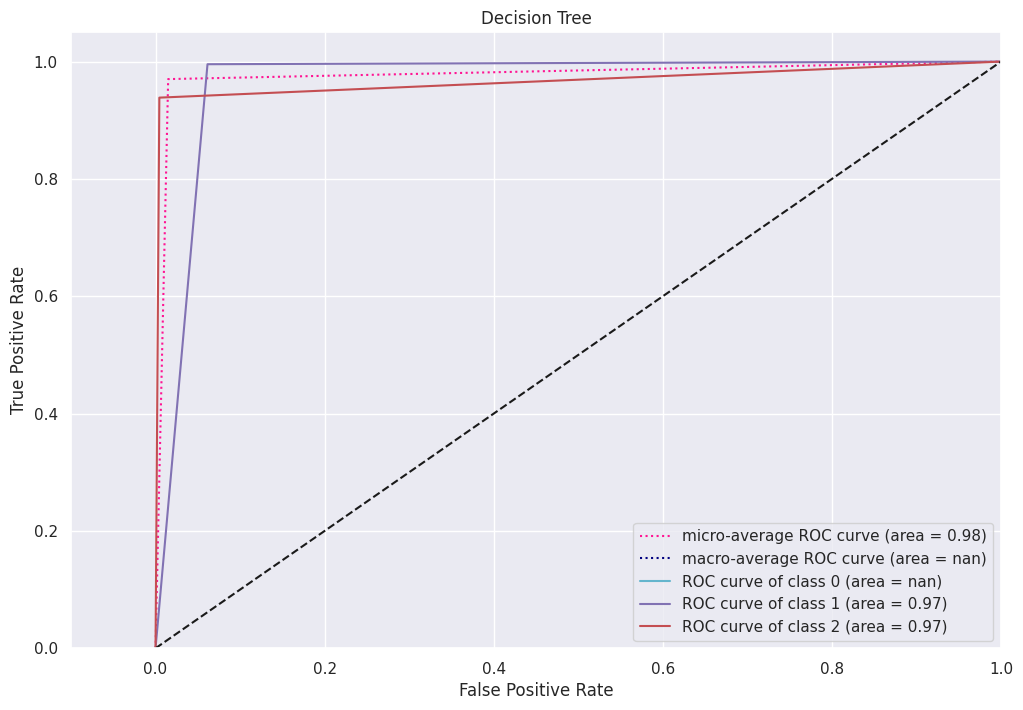

DATASET: Z12


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


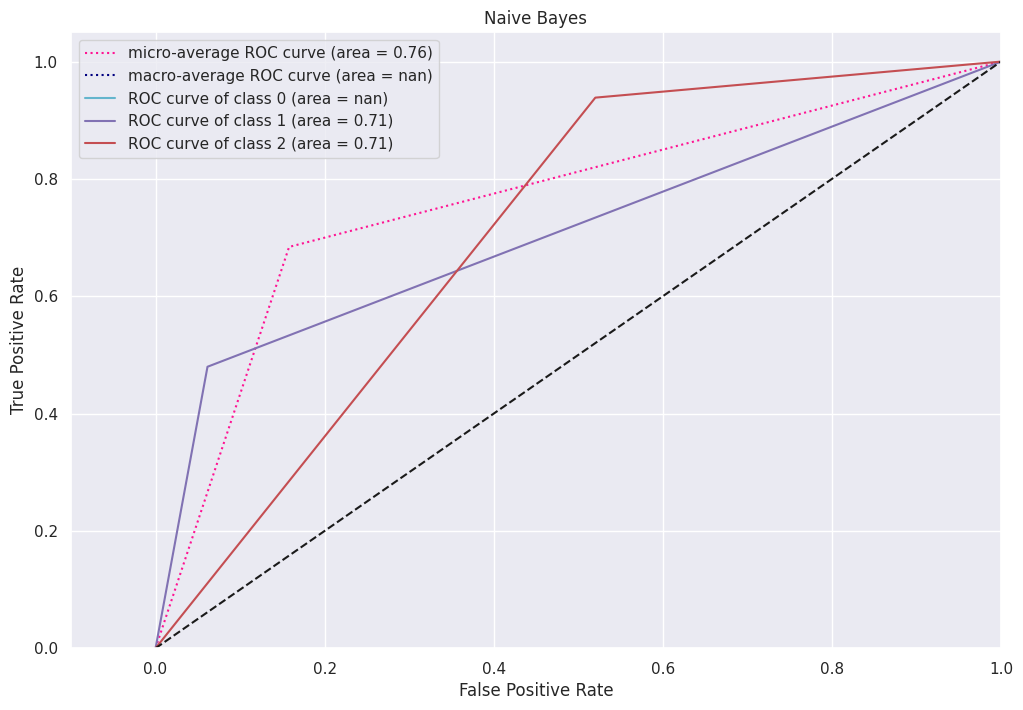

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


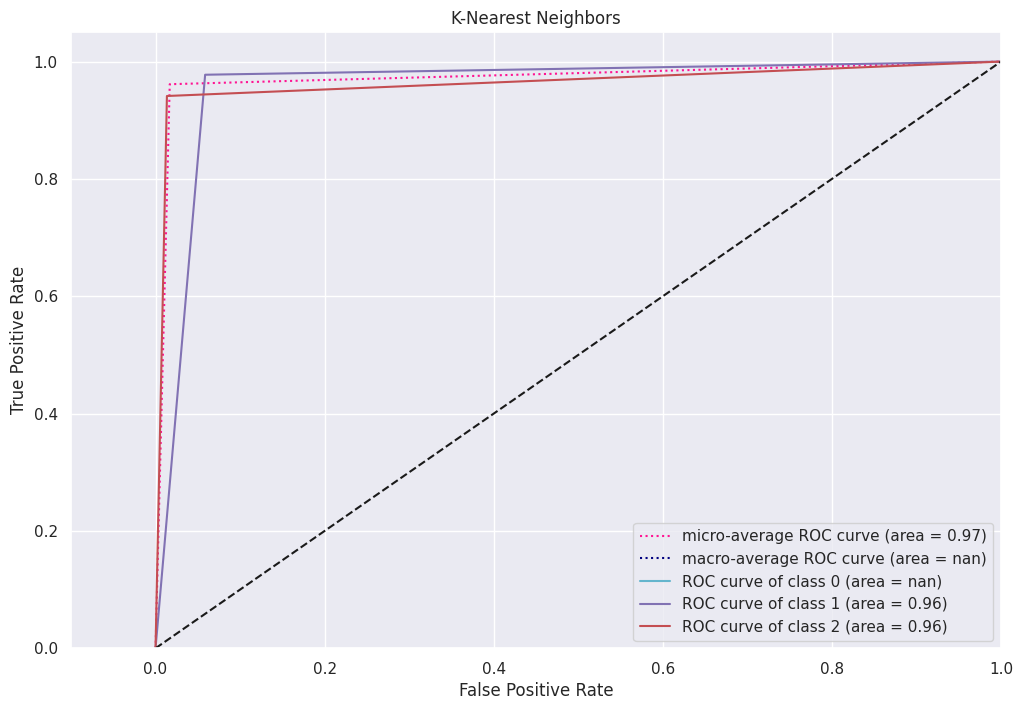

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


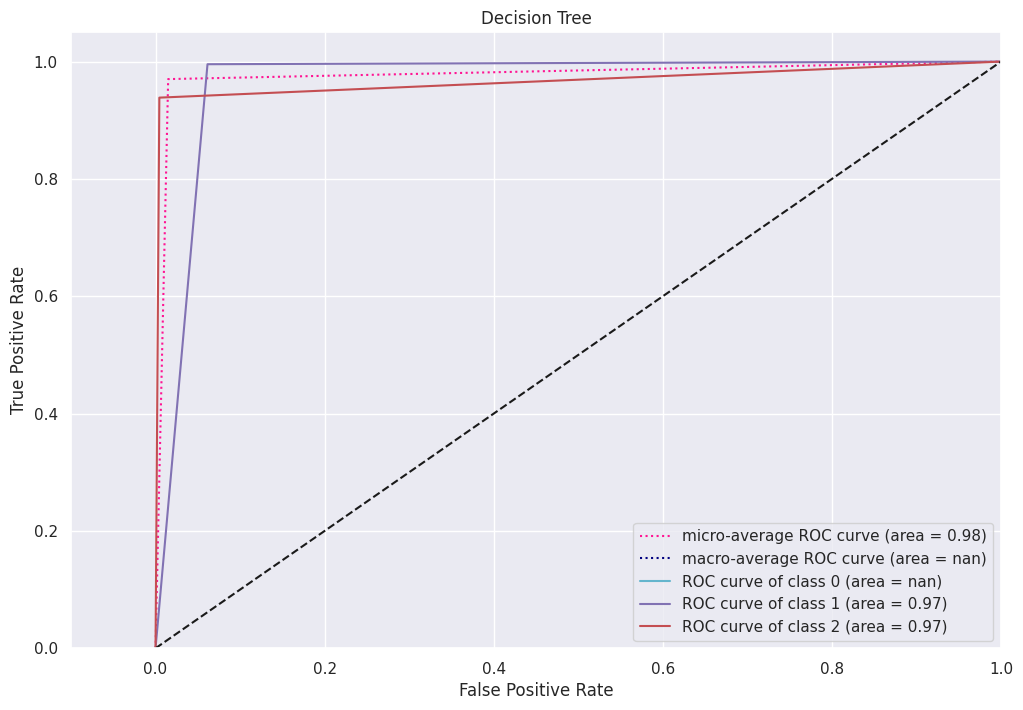

In [ ]:
datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

In [3]:
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()

NameError: ignored

In [2]:
lr = create_model('lr')

NameError: ignored

In [1]:
et_pca = create_model('et')

NameError: ignored